# Section 1: Import the data and do basic EDA

This python notebook will work exclusively on edrp_elec.csv data.

For Finn and Shruti, change your csv_path to open the file.

In [2]:
import pandas as pd

# Path to the CSV file
csv_path = r"C:\Users\gerva\OneDrive\Documentos\LONDON SCHOOL OF ECONOMICS\ST498 CAPSTONE PROJECT\7591elec_filtered.csv"

# Read the CSV into a DataFrame
df_filtered = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
print(df_filtered.head())


   ANON_ID   ADVANCEDATETIME  HH  ELECKWH
0     5110  15FEB08:12:30:00  25     0.60
1    11617  15FEB08:12:30:00  25     0.25
2     9015  15FEB08:12:30:00  25     0.40
3    11628  15FEB08:12:30:00  25     0.85
4    11158  15FEB08:12:30:00  25     0.20


Code to export filtered data into csv

In [11]:

# Ensure ADVANCEDATETIME is in datetime format
df_filtered['ADVANCEDATETIME'] = pd.to_datetime(df_filtered['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

# Extract the year from ADVANCEDATETIME
df_filtered['Year'] = df_filtered['ADVANCEDATETIME'].dt.year

# Filter for rows where the year is 2009
df_2009 = df_filtered[df_filtered['Year'] == 2009]

# Output the 2009 data to a CSV file
output_path = r"C:\Users\gerva\OneDrive\Documentos\LONDON SCHOOL OF ECONOMICS\ST498 CAPSTONE PROJECT\7591elec_2009.csv"
df_2009.to_csv(output_path, index=False)

print(f"2009 data has been saved to: {output_path}")


2009 data has been saved to: C:\Users\gerva\OneDrive\Documentos\LONDON SCHOOL OF ECONOMICS\ST498 CAPSTONE PROJECT\7591elec_2009.csv


This chunk of code gets the ANON_ID that have 'ElecOnly' from the metafile.

dask library is needed

In [20]:
# !pip install dask
import dask.dataframe as dd

# Path to the CSV file
csv_path = r"C:\Users\gerva\OneDrive\Documentos\LONDON SCHOOL OF ECONOMICS\ST498 CAPSTONE PROJECT\7591elec_1489be66b1659070840e4ac791bc2997\7591elec\csv\edrp_elec.csv"

# Path to the output CSV file
output_path = r"C:\Users\gerva\OneDrive\Documentos\LONDON SCHOOL OF ECONOMICS\ST498 CAPSTONE PROJECT\7591elec_filtered.csv"

# Load the anonIDs with 'ElecOnly' fuel types
geo_path = r"C:\Users\gerva\Downloads\edrp_geography_data.xlsx"
df_geo = pd.read_excel(geo_path)
elec_only_ids = set(df_geo[df_geo['fuelTypes'] == 'ElecOnly']['anonID'])

# Load the CSV file as a Dask DataFrame
df = dd.read_csv(csv_path)

# Filter the DataFrame based on the 'ANON_ID's
df_filtered = df[df['ANON_ID'].isin(elec_only_ids)]

# Save the filtered data to a new CSV file
df_filtered.to_csv(output_path, single_file=True, index=False)

print(f"Filtered data saved to: {output_path}")


KeyboardInterrupt: 

Plot:

In [ ]:
'''
import matplotlib.pyplot as plt

# Take the first 480 entries
df_123_selected_limited = df_123_selected.head(96)

# Plot ELECKWH vs ADVANCEDATETIME for the first 480 entries
plt.figure(figsize=(12, 6))
plt.plot(df_123_selected_limited['ADVANCEDATETIME'], df_123_selected_limited['ELECKWH'], marker='o')
plt.xlabel('Advanced Date Time')
plt.ylabel('Electricity Consumption (ELECKWH)')
plt.title('Electricity Consumption for ANON_ID 123 (First 96 Entries)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjusts plot to prevent clipping of labels
plt.show()
'''


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure ADVANCEDATETIME is in datetime format
df_filtered['ADVANCEDATETIME'] = pd.to_datetime(df_filtered['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

# Extract the year from ADVANCEDATETIME
df_filtered['Year'] = df_filtered['ADVANCEDATETIME'].dt.year

# Group by Year and HH, then calculate the average ELECKWH
df_avg_by_year_hh = df_filtered.groupby(['Year', 'HH'])['ELECKWH'].mean().reset_index()

# Plot the average ELECKWH for each year
plt.figure(figsize=(14, 8))

# Get unique years for plotting
years = sorted(df_avg_by_year_hh['Year'].unique())

# Plot each year's data
for year in years:
    year_data = df_avg_by_year_hh[df_avg_by_year_hh['Year'] == year]
    plt.plot(year_data['HH'], year_data['ELECKWH'], marker='o', label=f'Year {year}')

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average Electricity Consumption (ELECKWH)')
plt.title('Average Electricity Consumption by Half Hour for Each Year')
plt.xticks(range(1, 49))  # HH values range from 1 to 48
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()



TypeError: Column assignment doesn't support type <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

In [ ]:
'''
import pandas as pd
import matplotlib.pyplot as plt

# Ensure ADVANCEDATETIME is in datetime format
df['ADVANCEDATETIME'] = pd.to_datetime(df['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

# Extract the year from ADVANCEDATETIME
df['Year'] = df['ADVANCEDATETIME'].dt.year

# Group by Year and HH, then calculate the average ELECKWH
df_avg_by_year_hh = df.groupby(['Year', 'HH'])['ELECKWH'].mean().reset_index()

# Plot the average ELECKWH for each year
plt.figure(figsize=(14, 8))

# Get unique years for plotting
years = sorted(df_avg_by_year_hh['Year'].unique())

# Plot each year's data
for year in years:
    year_data = df_avg_by_year_hh[df_avg_by_year_hh['Year'] == year]
    plt.plot(year_data['HH'], year_data['ELECKWH'], marker='o', label=f'Year {year}')

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average Electricity Consumption (ELECKWH)')
plt.title('Average Electricity Consumption by Half Hour for Each Year')
plt.xticks(range(1, 49))  # HH values range from 1 to 48
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()
'''


Plot for all ANONIDs the KWH throughout the day by month.

In [ ]:
'''
import pandas as pd
import matplotlib.pyplot as plt

# Ensure ADVANCEDATETIME is in datetime format with the correct format
df['ADVANCEDATETIME'] = pd.to_datetime(df['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

# Extract the month from ADVANCEDATETIME and create a new column for it
df['Month'] = df['ADVANCEDATETIME'].dt.month

# Group by Month and HH, then calculate the average ELECKWH
df_avg_by_month_hh = df.groupby(['Month', 'HH'])['ELECKWH'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(14, 8))

# Define a list of month names for labeling
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot each month
for month in range(1, 13):
    month_data = df_avg_by_month_hh[df_avg_by_month_hh['Month'] == month]
    plt.plot(month_data['HH'], month_data['ELECKWH'], marker='o', label=month_names[month - 1])

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average Electricity Consumption (ELECKWH)')
plt.title('Average Electricity Consumption by Half Hour for Each Month')
plt.xticks(range(1, 49))  # HH values range from 1 to 48
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()
'''

# Section 2: Create a reduced dataframe

Create a reduced dataframe with less ANONIDS for computational capacity.
Plot the average KWH per season throughout the day.

It would be useful to import the data from the complementary data: Accorn, Location, FuelType

Considerations:
* Drop from 23 Dec to 2 Jan because of difference in pattern.
* Each season has 3 months
* At least one entry per HH

In [445]:
import pandas as pd

# Filter for ANON_IDs 1 to 5000
df100 = df_filtered[df_filtered['ANON_ID'].between(1, 15000)]

# Ensure ADVANCEDATETIME is in datetime format
df100['ADVANCEDATETIME'] = pd.to_datetime(df100['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S', errors='coerce')

# Extract the year and month
df100['Year'] = df100['ADVANCEDATETIME'].dt.year
df100['Month'] = df100['ADVANCEDATETIME'].dt.month

# Filter for summer months (May, June, July)
df100 = df100[df100['Month'].isin([3,4,5, 6, 7,8,9])]

# Keep the year with the most entries
most_common_year = df100['Year'].value_counts().idxmax()
df100 = df100[df100['Year'] == most_common_year]

# Drop unnecessary columns if no longer needed
df100 = df100.drop(columns=['Month', 'Year'])

# Define the columns to check for numeric values
columns_to_check = ['ANON_ID', 'HH', 'ELECKWH']
for col in columns_to_check:
    df100[col] = pd.to_numeric(df100[col], errors='coerce')
df100 = df100.dropna(subset=columns_to_check)
df100 = df100.reset_index(drop=True)

# Keep only ANON_IDs with entries for all HH values
unique_hh_per_anon = df100.groupby('ANON_ID')['HH'].nunique()
valid_anon_ids = unique_hh_per_anon[unique_hh_per_anon == df100['HH'].nunique()].index
df100 = df100[df100['ANON_ID'].isin(valid_anon_ids)]

print(df100.head())
print(df100.shape)


C:\Users\gerva\AppData\Local\Temp\ipykernel_9800\3439657454.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100['ADVANCEDATETIME'] = pd.to_datetime(df100['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S', errors='coerce')
C:\Users\gerva\AppData\Local\Temp\ipykernel_9800\3439657454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100['Year'] = df100['ADVANCEDATETIME'].dt.year
C:\Users\gerva\AppData\Local\Temp\ipykernel_9800\3439657454.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

   ANON_ID ADVANCEDATETIME  HH  ELECKWH
0    12860      2009-03-01   0     0.31
1     3796      2009-03-01   0     0.19
2     1646      2009-03-01   0     0.51
3    11175      2009-03-01   0     0.25
4     8718      2009-03-01   0     0.10
(42843291, 4)


## HISTOGRAM ANON_ID

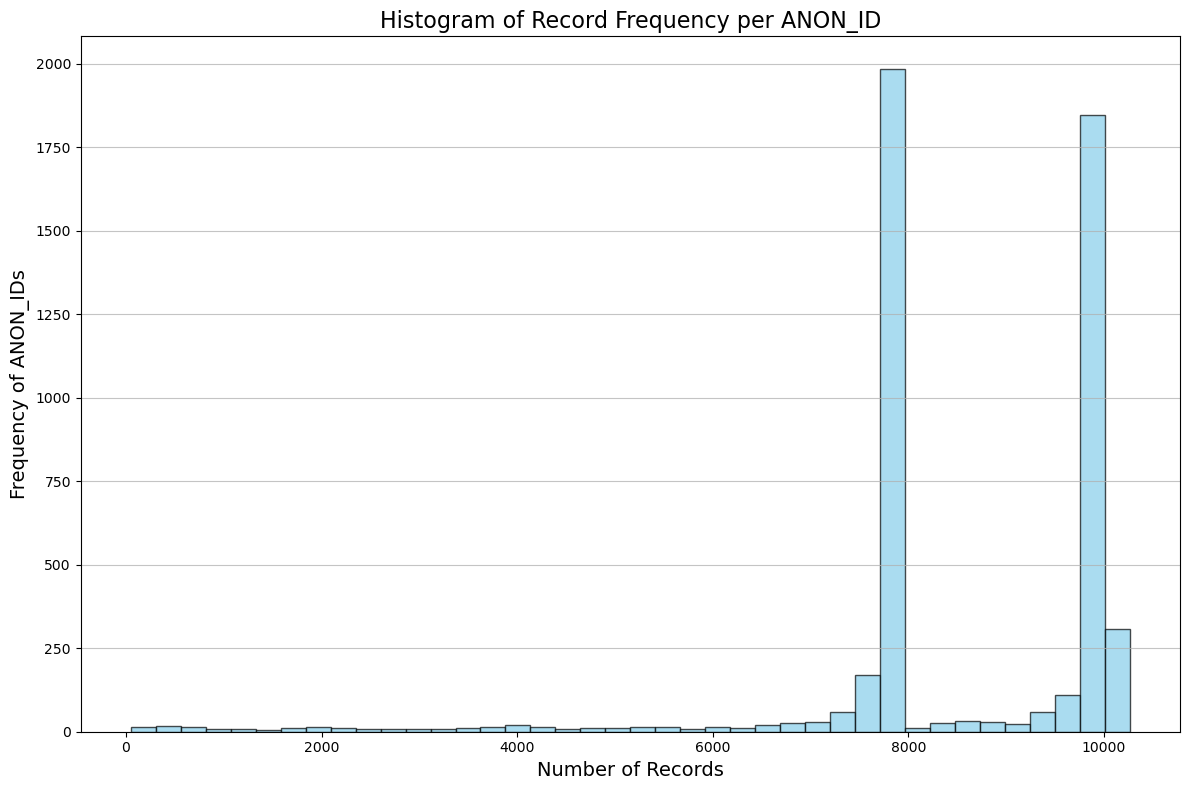

In [447]:
import matplotlib.pyplot as plt

# Count the frequency of each ANON_ID
anon_id_counts = df100['ANON_ID'].value_counts()

# Plot the histogram
plt.figure(figsize=(12, 8))
plt.hist(anon_id_counts, bins=40, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Record Frequency per ANON_ID', fontsize=16)
plt.xlabel('Number of Records', fontsize=14)
plt.ylabel('Frequency of ANON_IDs', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


          ANON_ID     ADVANCEDATETIME  HH  ELECKWH
0           12860 2009-03-01 00:00:00   0    0.310
1            3796 2009-03-01 00:00:00   0    0.190
2            1646 2009-03-01 00:00:00   0    0.510
3           11175 2009-03-01 00:00:00   0    0.250
4            8718 2009-03-01 00:00:00   0    0.100
...           ...                 ...  ..      ...
23249230     9365 2009-03-14 06:30:00  13    0.078
23249231    11196 2009-04-18 20:00:00  40    1.030
23249232     6914 2009-05-10 18:30:00  37    1.230
23249233    11393 2009-05-02 03:30:00   7    0.110
23249234    11346 2009-03-14 05:30:00  11    0.047

[23249235 rows x 4 columns]
Number of remaining ANON_IDs: 2350


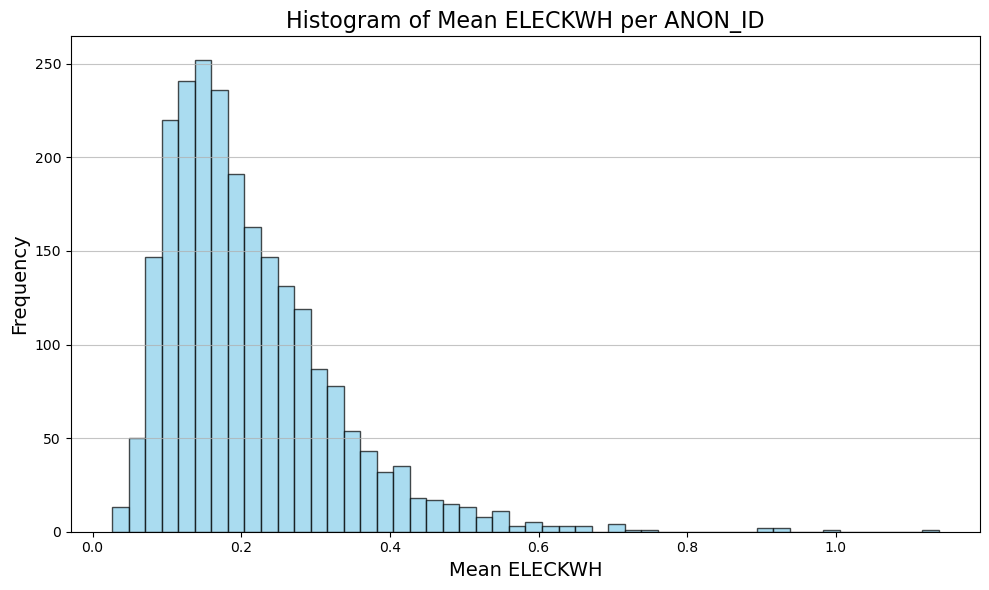

In [449]:
# Count the frequency of each ANON_ID
anon_id_counts = df100['ANON_ID'].value_counts()

# Identify ANON_IDs with frequency >= 4100
valid_anon_ids = anon_id_counts[anon_id_counts >= 9000].index

# Filter df100 to keep only the valid ANON_IDs
df100 = df100[df100['ANON_ID'].isin(valid_anon_ids)]

# Reset the index for cleanliness
df100 = df100.reset_index(drop=True)

# Display the resulting DataFrame
print(df100)
print(f"Number of remaining ANON_IDs: {len(valid_anon_ids)}")


import matplotlib.pyplot as plt

# Calculate the mean ELECKWH for each ANON_ID
mean_eleckwh_per_anon = df100.groupby('ANON_ID')['ELECKWH'].mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(mean_eleckwh_per_anon, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Mean ELECKWH per ANON_ID', fontsize=16)
plt.xlabel('Mean ELECKWH', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


Identify those ANON_ID with low aveerage consumption.

Number of ANON_IDs with mean ELECKWH < 0.: 272


<function matplotlib.pyplot.show(close=None, block=None)>

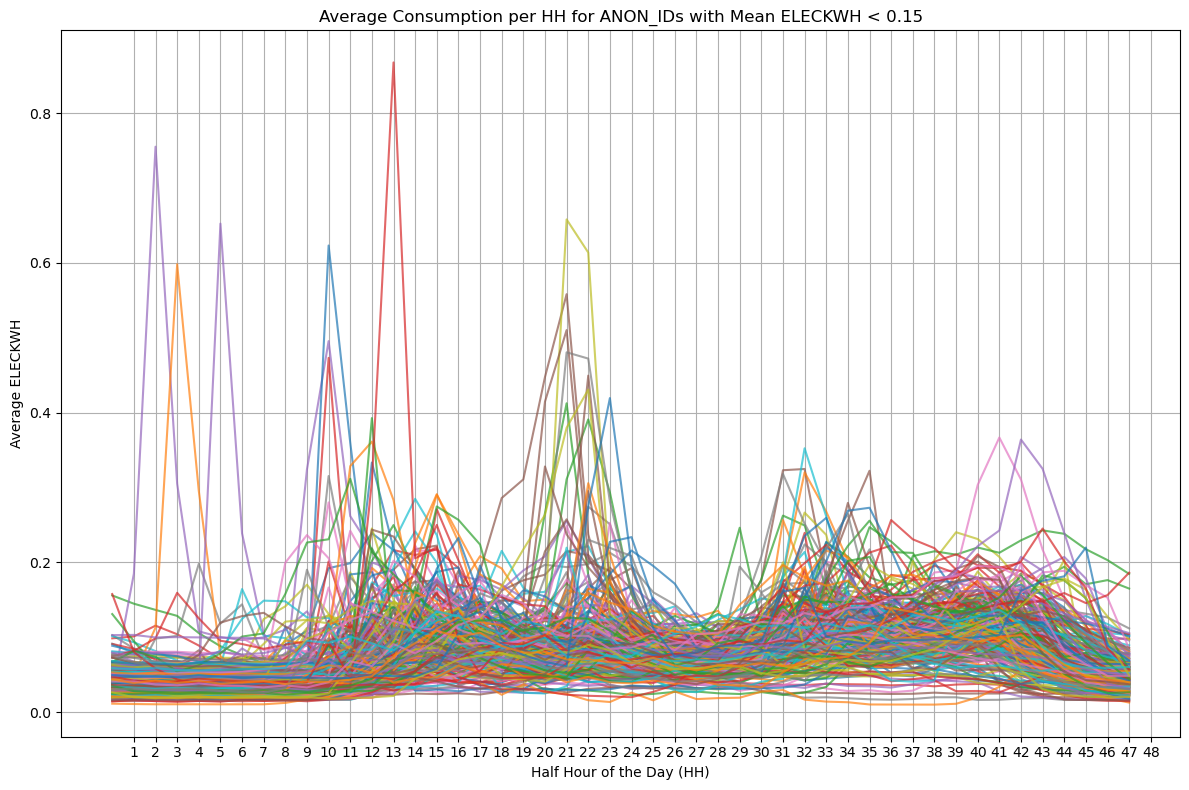

In [541]:
# Calculate the mean ELECKWH for each ANON_ID
mean_eleckwh_per_anon = df100.groupby('ANON_ID')['ELECKWH'].mean()

# Filter ANON_IDs with mean ELECKWH < 0.15
anon_ids_below_threshold = mean_eleckwh_per_anon[mean_eleckwh_per_anon < 0.1].index.tolist()

# Count the number of ANON_IDs
count_below_threshold = len(anon_ids_below_threshold)

# Output the results
print(f"Number of ANON_IDs with mean ELECKWH < 0.: {count_below_threshold}")

import matplotlib.pyplot as plt

# Calculate the mean ELECKWH for each ANON_ID
mean_eleckwh_per_anon = df100.groupby('ANON_ID')['ELECKWH'].mean()

# Filter ANON_IDs with mean ELECKWH < 0.15
anon_ids_below_threshold = mean_eleckwh_per_anon[mean_eleckwh_per_anon < 0.1].index.tolist()

# Filter df100 to include only the selected ANON_IDs
filtered_df = df100[df100['ANON_ID'].isin(anon_ids_below_threshold)]

# Calculate the average consumption per HH for each ANON_ID
avg_consumption_per_hh = (
    filtered_df.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
    .sort_values(by='HH')
)

# Plot the data
plt.figure(figsize=(12, 8))

# Loop through each ANON_ID and plot their consumption
for anon_id in anon_ids_below_threshold:
    anon_data = avg_consumption_per_hh[avg_consumption_per_hh['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], label=f'ANON_ID: {anon_id}', alpha=0.7)

# Plot details
plt.title('Average Consumption per HH for ANON_IDs with Mean ELECKWH < 0.15')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # Assuming HH ranges from 1 to 48
plt.grid(True)

plt.tight_layout()
plt.show



Plot the consumption per season throughout the day.

In [ ]:
'''
# Plotting
plt.figure(figsize=(12, 6))
df100_avg_hh_season = df100_avg_hh_season.sort_values(by='HH').reset_index(drop=True)
seasons = [0, 1, 2, 3]
for season in seasons:
    season_data = df100_avg_hh_season[df100_avg_hh_season['Season'] == season]
    plt.plot(season_data['HH'], season_data['ELECKWH'], marker='o', label=f'Season {season}')

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average Electricity Consumption (ELECKWH)')
plt.title('Average Electricity Consumption by Half Hour for Each Season')
plt.xticks(range(0, 48))  # HH values range from 0 to 47
plt.grid(True)
plt.legend(title='Season')
plt.tight_layout()

# Show the plot
plt.show()
'''

## Section 2.1 Define a function that splits the day in 4 periods 
Split in 4 periods, calculate the mean accordingly per season. 

The periods are:
* 'bre' - breakfast: 6 - 10
* 'day' - day: 10.30 - 16
* 'eve' - evening: 16.30 - 22
* 'nig' - night: 22.30 - 5.30

In [475]:
import dask.dataframe as dd
import pandas as pd

# Ensure ADVANCEDATETIME is in datetime format
df100['ADVANCEDATETIME'] = dd.to_datetime(df100['ADVANCEDATETIME'], errors='coerce')

df100['Month'] = df100['ADVANCEDATETIME'].dt.month
df100['Weekend'] = df100['ADVANCEDATETIME'].dt.weekday.isin([5, 6]).astype(int)

# Define a function to assign HH to specific groups
def hh_group(hh):
    if 12 <= hh <= 20:
        return 'bre'  # Morning to Early Afternoon
    elif 21 <= hh <= 32:
        return 'day'  # Afternoon
    elif 33 <= hh <= 44:
        return 'eve'  # Evening
    else:
        return 'nig'  # Night

# Apply the hh_group function correctly using .map
df100['HH_Group'] = df100['HH'].map(hh_group)
# Group by ANON_ID, HH_Group, and Weekend, and calculate the average ELECKWH
df_100_means = df100.groupby(['ANON_ID', 'HH_Group', 'Weekend'])['ELECKWH'].mean().reset_index()
# Rename the 'ELECKWH' column to 'KWH_by_SeasonTimeWknd'
df_100_means = df_100_means.rename(columns={'ELECKWH': 'KWH_by_SeasonTimeWknd'})

# Display the result
print(df_100_means.head())

   ANON_ID HH_Group  Weekend  KWH_by_SeasonTimeWknd
0        3      bre        0               0.291334
1        3      bre        1               0.265443
2        3      day        0               0.303322
3        3      day        1               0.262811
4        3      eve        0               0.355373


### Section 2.1.1 Based on Slovenian Paper, compute the features

Compute Relative Mean Consumption by HH_GROUP (bre, day, eve, nig) 

In [477]:
import pandas as pd

# Group by ANON_ID and HH_Group to compute the mean ELECKWH for each group
mean_by_group = (
    df100.groupby(['ANON_ID', 'HH_Group'])['ELECKWH']
    .mean()
    .reset_index()
)

# Compute the overall mean ELECKWH for each ANON_ID
mean_overall = (
    df100.groupby('ANON_ID')['ELECKWH']
    .mean()
    .reset_index()
)

mean_overall = mean_overall.rename(columns={'ELECKWH': 'Overall_Mean'})

# Merge the grouped mean with the overall mean
merged = mean_by_group.merge(mean_overall, on='ANON_ID')

# Calculate the Relative Mean Electricity (RME)
merged['RME'] = merged['ELECKWH'] / merged['Overall_Mean']

# Pivot the table to have RME_bre, RME_day, RME_eve, RME_nig as columns
df_rme = merged.pivot(index='ANON_ID', columns='HH_Group', values='RME').reset_index()

# Rename columns
df_rme = df_rme.rename(columns={ 'bre': 'RME_bre', 'day': 'RME_day', 'eve': 'RME_eve','nig': 'RME_nig' })

# Reset index to remove hierarchical indexing (if present)
df_rme.columns.name = None
df_rme = df_rme.fillna(0)

print(df_rme)

      ANON_ID   RME_bre   RME_day   RME_eve   RME_nig
0           3  0.989134  1.016322  1.240597  0.801268
1           5  1.648876  0.997713  1.251994  0.409331
2           7  0.809611  0.809244  1.738360  0.676150
3           8  1.413679  0.885792  1.440350  0.489552
4          21  1.122629  1.181368  1.190983  0.628582
...       ...       ...       ...       ...       ...
2345    14981  1.236841  0.929253  1.406364  0.589402
2346    14983  1.128845  0.889766  1.067693  0.956769
2347    14989  0.844510  0.905684  1.686907  0.617351
2348    14993  1.108354  0.797924  1.112127  1.006947
2349    15000  0.649891  1.186541  1.818058  0.406105

[2350 rows x 5 columns]


### Plot for a specific ANON_ID the average daily consumption

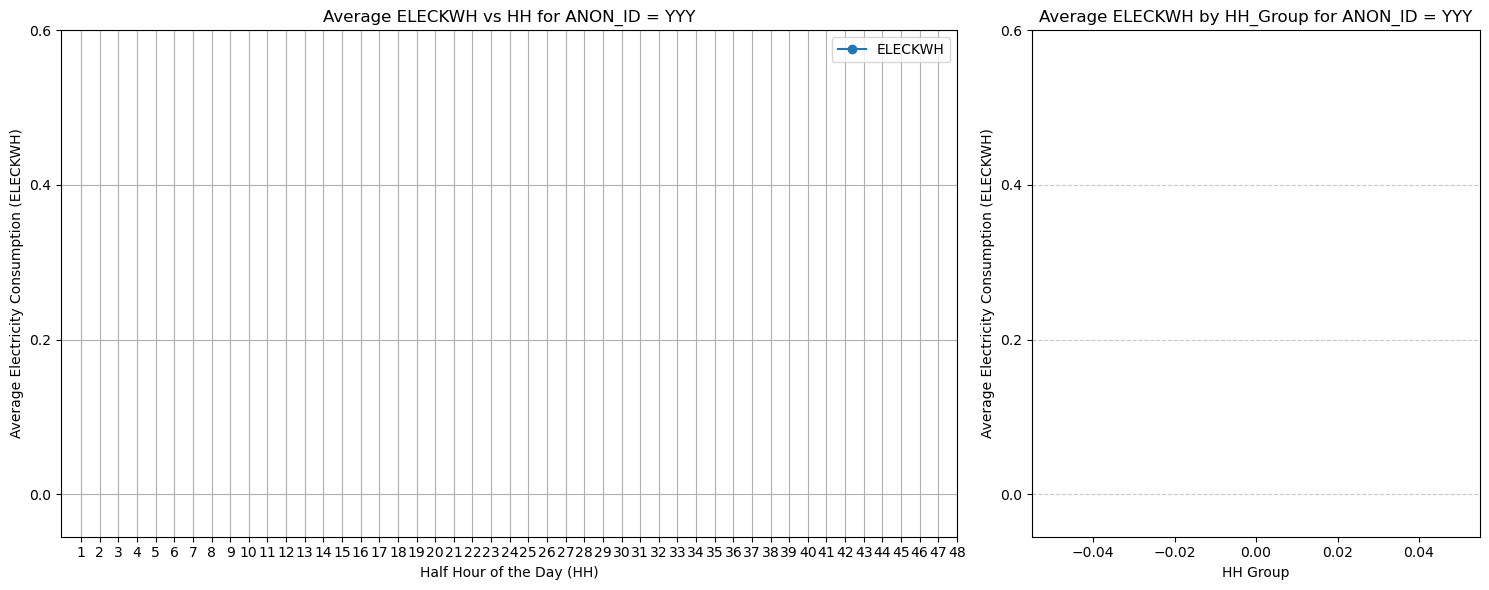

(0, 7)


In [484]:
import matplotlib.pyplot as plt

# Step 1: Compute the average ELECKWH over time for each HH
df_anon3 = df100[df100['ANON_ID'] == 745]
average_eleckwh_by_hh = df_anon3.groupby('HH')['ELECKWH'].mean().reset_index()

# Step 2: Compute the average ELECKWH for each HH_Group for ANON_ID = 3
df_anon3['HH_Group'] = df_anon3['HH'].map(hh_group)
average_eleckwh_by_hh_group = df_anon3.groupby('HH_Group')['ELECKWH'].mean().reset_index()

# Plot both charts side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1]})

# Plot 1: Average ELECKWH vs HH for ANON_ID = 3
axes[0].plot(
    average_eleckwh_by_hh['HH'], 
    average_eleckwh_by_hh['ELECKWH'], 
    marker='o', linestyle='-', label='ELECKWH'
)
axes[0].set_title('Average ELECKWH vs HH for ANON_ID = YYY')
axes[0].set_xlabel('Half Hour of the Day (HH)')
axes[0].set_ylabel('Average Electricity Consumption (ELECKWH)')
axes[0].set_xticks(range(1, 49))  # HH ranges from 1 to 48
axes[0].set_yticks([0, 0.2, 0.4, 0.6])  # Define y-axis values
axes[0].grid(True)
axes[0].legend()

# Plot 2: Average ELECKWH by HH_Group for ANON_ID = 3
axes[1].bar(
    average_eleckwh_by_hh_group['HH_Group'], 
    average_eleckwh_by_hh_group['ELECKWH'], 
    color='skyblue'
)
axes[1].set_title('Average ELECKWH by HH_Group for ANON_ID = YYY')
axes[1].set_xlabel('HH Group')
axes[1].set_ylabel('Average Electricity Consumption (ELECKWH)')
axes[1].set_yticks([0, 0.2, 0.4, 0.6])  # Define y-axis values
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
print(df_anon3.shape)


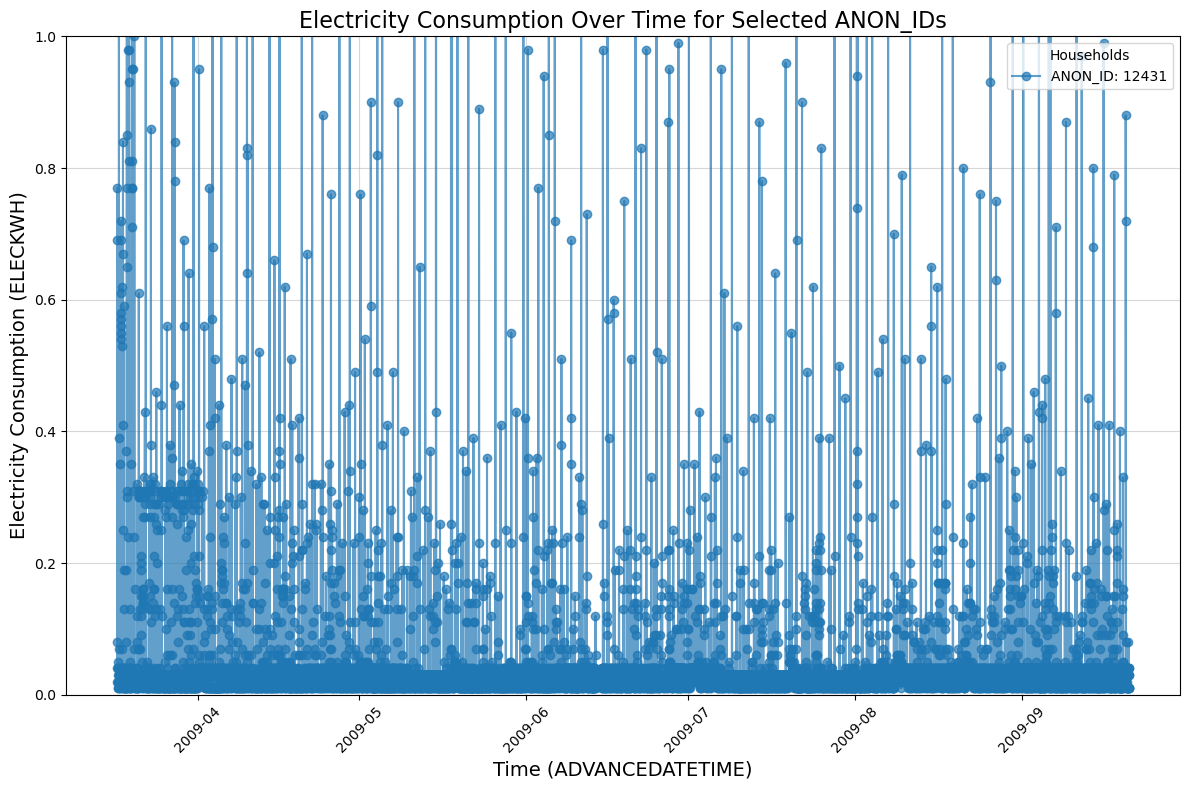

In [502]:
import matplotlib.pyplot as plt

# Define the filter criteria
anon_ids = [ 12431] #,3533,3171]#[1458, 1510, 3086, 1455, 984]
start_date = '2009-03-16'
end_date = '2009-09-21'

# Filter the DataFrame for the selected ANON_IDs and date range
filtered_data = df100[
    (df100['ANON_ID'].isin(anon_ids)) &
    (df100['ADVANCEDATETIME'] >= start_date) & 
    (df100['ADVANCEDATETIME'] <= end_date)
]


# Ensure the data is sorted by time for proper plotting
filtered_data = filtered_data.sort_values('ADVANCEDATETIME')

# Plot for each ANON_ID
plt.figure(figsize=(12, 8))
for anon_id in anon_ids:
    anon_data = filtered_data[filtered_data['ANON_ID'] == anon_id]
    plt.plot(anon_data['ADVANCEDATETIME'], anon_data['ELECKWH'], marker='o', linestyle='-', alpha=0.7, label=f'ANON_ID: {anon_id}')

# Customize the plot
plt.title('Electricity Consumption Over Time for Selected ANON_IDs', fontsize=16)
plt.xlabel('Time (ADVANCEDATETIME)', fontsize=14)
plt.ylabel('Electricity Consumption (ELECKWH)', fontsize=14)
plt.ylim(0, 1)  # Set y-axis range to 0-1
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.legend(title='Households', fontsize=10, loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()



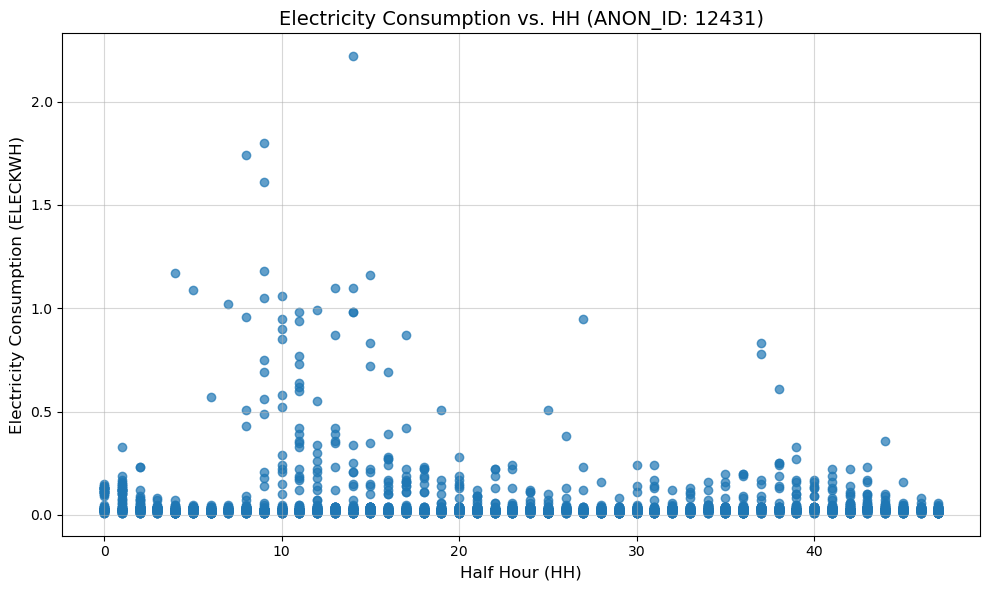

In [504]:
import matplotlib.pyplot as plt

# Define the filter criteria
anon_id = 12431
start_date = '2009-06-01'
end_date = '2009-07-27'

# Filter the DataFrame by ANON_ID and date range
filtered_data = df100[
    (df100['ANON_ID'] == anon_id) & 
    (df100['ADVANCEDATETIME'] >= start_date) & 
    (df100['ADVANCEDATETIME'] <= end_date)
]

# Ensure the data is sorted by HH for consistent plotting
filtered_data = filtered_data.sort_values('HH')

# Plot ELECKWH vs. HH
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['HH'], filtered_data['ELECKWH'], alpha=0.7)
plt.title(f'Electricity Consumption vs. HH (ANON_ID: {anon_id})', fontsize=14)
plt.xlabel('Half Hour (HH)', fontsize=12)
plt.ylabel('Electricity Consumption (ELECKWH)', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


### Compute the Mean Relative Standard Deviation

In [482]:
import pandas as pd

# Group by ANON_ID and HH_Group to compute mean and standard deviation for ELECKWH
stats_by_group_og = (
    df100.groupby(['ANON_ID', 'HH_Group'])['ELECKWH']
    .agg(['mean', 'std'])
    .reset_index()
)

# Rename columns for clarity
stats_by_group_og = stats_by_group_og.rename(columns={'mean': 'ELECKWH_mean', 'std': 'ELECKWH_std'})

# Calculate the Relative Standard Deviation (RSD) for each group
stats_by_group_og['RSD'] = (stats_by_group_og['ELECKWH_std'] / stats_by_group_og['ELECKWH_mean'])

# Pivot the table to have RSD_bre, RSD_day, RSD_eve, RSD_nig as columns
df_rsd_og = stats_by_group_og.pivot(index='ANON_ID', columns='HH_Group', values='RSD').reset_index()

# Rename the columns for clarity
df_rsd_og = df_rsd_og.rename(columns={'bre': 'RSD_bre','day': 'RSD_day','eve': 'RSD_eve','nig': 'RSD_nig'})
df_rsd_og = df_rsd_og.fillna(0)

# Add a column for the average RSD across all HH_Groups
df_rsd_og['RSD_avg'] = df_rsd_og[['RSD_bre', 'RSD_day', 'RSD_eve', 'RSD_nig']].mean(axis=1)

# Display the final table
print(df_rsd_og)

# Find the 5 ANON_IDs with the highest RSD_avg
top_5_rsd_avg_OG = df_rsd_og.nlargest(5, 'RSD_avg')[['ANON_ID', 'RSD_avg']]
print("Top 5 ANON_IDs with the highest RSD_avg:")
print(top_5_rsd_avg_OG)

top_5_rsd_avg_OG = df_rsd_og.nsmallest(5, 'RSD_avg')[['ANON_ID', 'RSD_avg']]
print("Botton 5 ANON_IDs with the highest RSD_avg:")
print(top_5_rsd_avg_OG)



HH_Group  ANON_ID   RSD_bre   RSD_day   RSD_eve   RSD_nig   RSD_avg
0               3  0.495381  0.527542  0.531598  0.453003  0.501881
1               5  1.244508  0.744330  0.641772  0.490386  0.780249
2               7  1.173922  1.288266  0.888451  0.462141  0.953195
3               8  1.075021  1.085087  0.861068  0.585942  0.901779
4              21  1.010913  0.848005  0.517429  0.425622  0.700492
...           ...       ...       ...       ...       ...       ...
2345        14981  1.521762  1.420179  1.508492  0.676108  1.281635
2346        14983  1.011431  0.664445  0.758607  0.959435  0.848479
2347        14989  1.094987  1.434387  1.007873  0.708822  1.061518
2348        14993  0.835117  0.660102  0.665280  1.350508  0.877752
2349        15000  1.236531  1.288481  0.970503  1.332701  1.207054

[2350 rows x 6 columns]
Top 5 ANON_IDs with the highest RSD_avg:
HH_Group  ANON_ID   RSD_avg
1474         9272  2.580715
1937        12431  2.471999
1579        10044  2.442918
1869  

Compute the Weekday vs Weekend Score

In [518]:
import pandas as pd

# Ensure 'ADVANCEDATETIME' is in datetime format
df100['ADVANCEDATETIME'] = pd.to_datetime(df100['ADVANCEDATETIME'], errors='coerce')

# Add 'Weekend' column (1 for weekend, 0 for weekday)
df100['Weekend'] = df100['ADVANCEDATETIME'].dt.weekday.isin([5, 6]).astype(int)

# Group by ANON_ID, HH_Group, and Weekend to compute the mean ELECKWH
weekend_means = (
    df100.groupby(['ANON_ID', 'HH_Group', 'Weekend'])['ELECKWH']
    .mean()
    .reset_index()
)

# Pivot the table to have separate columns for weekday (0) and weekend (1) means
weekend_pivot = (
    weekend_means.pivot_table(
        index=['ANON_ID', 'HH_Group'], 
        columns='Weekend', 
        values='ELECKWH'
    )
    .reset_index()
)

# Rename the columns for clarity
weekend_pivot = weekend_pivot.rename(columns={0: 'mean_weekday', 1: 'mean_weekend'})

# Fill missing values with 0 (in case some groups don't have data for weekdays or weekends)
weekend_pivot = weekend_pivot.fillna(0)

# Calculate the overall mean for each HH_Group within each ANON_ID
overall_means = (
    df100.groupby(['ANON_ID', 'HH_Group'])['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'mean_hh_group'})
)

# Merge the overall means with the weekday and weekend pivot table
merged = weekend_pivot.merge(overall_means, on=['ANON_ID', 'HH_Group'])

# Calculate the difference proportional to the average demand
merged['Difference'] = (merged['mean_weekend'] - merged['mean_weekday']) / merged['mean_hh_group']

# Group by ANON_ID and calculate the average difference across HH_Groups
df_weekday_weekend_diff = (
    merged.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Weekday_Weekend_Difference'})
)

# Display the final table
print(df_weekday_weekend_diff.tail())


      ANON_ID  Weekday_Weekend_Difference
2345    14981                   -0.182377
2346    14983                    0.036180
2347    14989                    0.329459
2348    14993                    0.114384
2349    15000                    0.130523


Join the dataframes to get per ANONID all the relevant features based only on its consumption.

In [537]:
import pandas as pd

# Ensure df_rsd only contains ANON_ID and RSD_avg
df_rsd_reduced = df_rsd_og[['ANON_ID', 'RSD_avg']]

# Merge df_rme with df_season_diff
df100_features = df_rme.merge(df_weekday_weekend_diff, on='ANON_ID', how='left')

# Merge with df_rsd_reduced to add RSD_avg
df100_features = df100_features.merge(df_rsd_reduced, on='ANON_ID', how='left')

# Rename the column for clarity
df100_features = df100_features.rename(columns={'Seasonal_Difference': 'SScore'})# Rename the column for clarity
df100_features = df100_features.rename(columns={'Weekday_Weekend_Difference': 'WScore'})
# Ensure ADVANCEDATETIME is a datetime object
df100['ADVANCEDATETIME'] = pd.to_datetime(df100['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S', errors='coerce')

# Extract the day from ADVANCEDATETIME
df100['Date'] = df100['ADVANCEDATETIME'].dt.date

# Compute daily max-min difference
daily_stats = df100.groupby(['ANON_ID', 'Date'])['ELECKWH'].agg(['max', 'min']).reset_index()
daily_stats['Daily_Max_Min_Diff'] = daily_stats['max'] - daily_stats['min'] 

# Compute the average daily max-min difference for each ANON_ID
avg_daily_diff = daily_stats.groupby('ANON_ID')['Daily_Max_Min_Diff'].mean().reset_index()
avg_daily_diff = avg_daily_diff.rename(columns={'Daily_Max_Min_Diff': 'Avg_Daily_Max_Min_Diff'})

# Compute the average ELECKWH for 'day' and 'eve' time periods
df100['HH_Group'] = df100['HH'].map(hh_group)  # Ensure HH_Group exists
df_day_eve = df100[df100['HH_Group'].isin(['day', 'eve','bre','nig'])]
day_eve_avg = df_day_eve.groupby(['ANON_ID', 'Date'])['ELECKWH'].mean().reset_index()
avg_day_eve = day_eve_avg.groupby('ANON_ID')['ELECKWH'].mean().reset_index()
avg_day_eve = avg_day_eve.rename(columns={'ELECKWH': 'Avg_Day_Eve'})

# Merge the new features into df100_features
df100_features = pd.merge(df100_features, avg_daily_diff, on='ANON_ID', how='left')
df100_features = pd.merge(df100_features, avg_day_eve, on='ANON_ID', how='left')

'''
#Drop RSD_avg greater than 2
df100_features = df100_features[df100_features['RSD_avg'] <= 2.2]
df100_features = df100_features.reset_index(drop=True)
'''

# Display the final df100_features DataFrame
print(df100_features.tail())


      ANON_ID   RME_bre   RME_day   RME_eve   RME_nig    WScore   RSD_avg  \
2345    14981  1.236841  0.929253  1.406364  0.589402 -0.182377  1.281635   
2346    14983  1.128845  0.889766  1.067693  0.956769  0.036180  0.848479   
2347    14989  0.844510  0.905684  1.686907  0.617351  0.329459  1.061518   
2348    14993  1.108354  0.797924  1.112127  1.006947  0.114384  0.877752   
2349    15000  0.649891  1.186541  1.818058  0.406105  0.130523  1.207054   

      Avg_Daily_Max_Min_Diff  Avg_Day_Eve  
2345                0.416990     0.069831  
2346                0.542816     0.183729  
2347                0.799296     0.169080  
2348                0.834806     0.259158  
2349                1.140079     0.185688  


In [509]:
ft = 'Avg_Day_Eve'
top_5 = df100_features.nsmallest(5, ft)[['ANON_ID', ft]]
print("Botton 5 ANON_IDs with the highest RSD_avg:")
print(top_5)

Botton 5 ANON_IDs with the highest RSD_avg:
     ANON_ID  Avg_Day_Eve
328     2177     0.026447
209     1319     0.030886
127      822     0.031287
346     2273     0.038263
7         33     0.041241


## Manual cluster excluding consumers with less than 0.1 KWH as mean

In [543]:
# Create a new DataFrame with ANON_IDs in anon_ids_below_threshold
df_below_threshold = df100_features[df100_features['ANON_ID'].isin(anon_ids_below_threshold)]

# Drop these ANON_IDs from df100selected
df100_features = df100_features[~df100_features['ANON_ID'].isin(anon_ids_below_threshold)]

# Display the shapes of the resulting DataFrames for confirmation
print(f"DataFrame with ANON_IDs below threshold: {df_below_threshold.shape}")
print(f"DataFrame after dropping those ANON_IDs: {df100_features.shape}")


DataFrame with ANON_IDs below threshold: (272, 9)
DataFrame after dropping those ANON_IDs: (2078, 9)


### Section 2.1.2 Get Accorn Group and merge it to all features
Outputs df100_features_comp with all the features for each ANON_ID

In [35]:
# Path to the Excel file
geo_path = r"C:\Users\gerva\Downloads\edrp_geography_data.xlsx"
df_geo = pd.read_excel(geo_path)
# Rename the column 'anonID' to 'ANON_ID' to match df100
df_geo = df_geo.rename(columns={'anonID': 'ANON_ID'})
df_geo = df_geo[['ANON_ID', 'ACORN_Category', 'ACORN_Group', 'NUTS1']]

# Merge df100 with df_geo based on ANON_ID
df100_features_comp = pd.merge(df100_features, df_geo, on='ANON_ID', how='inner')

# Data cleaning
df100_features_comp = df100_features_comp.dropna(subset=['ACORN_Category', 'ACORN_Group', 'NUTS1'])
df100_features_comp['ACORN_Category'] = pd.to_numeric(df100_features_comp['ACORN_Category'], errors='coerce')
df100_features_comp = df100_features_comp[
    df100_features_comp['ACORN_Category'].between(1, 6) & 
    df100_features_comp['ACORN_Group'].isin(list('ABCDEFGHIJKLMNOPQRSTU'))
]

# Output the shape of the DataFrame
print(f"Shape of the processed DataFrame: {df100_features_comp.shape}")
print(f"Head of the processed DataFrame: {df100_features_comp.head()}")

Shape of the processed DataFrame: (1664, 12)
Head of the processed DataFrame:    ANON_ID   RME_bre   RME_day   RME_eve   RME_nig    WScore   RSD_avg  \
0        3  1.025908  1.081741  1.167487  0.785145 -0.082527  0.542490   
1        5  1.622317  1.009039  1.245439  0.422368  0.184452  0.794916   
2        6  1.429404  0.974827  1.073450  0.703736 -0.115751  0.604438   
3        7  0.838230  0.813879  1.670294  0.709723  0.339304  1.004169   
4        8  1.477642  0.892969  1.343745  0.519155  0.190607  0.911906   

   Avg_Daily_Max_Min_Diff  Avg_Day_Eve  ACORN_Category ACORN_Group NUTS1  
0                0.566923     0.352426             3.0           I   UKJ  
1                1.202391     0.239092             4.0           M   UKM  
2                0.270489     0.070594             3.0           H   UKJ  
3                0.800659     0.205371             3.0           I   UKF  
4                0.838043     0.267509             3.0           H   UKJ  


## Section 2.2 Correlation Heatmap and Pairplot

Correlation Heatmap with only numerical features

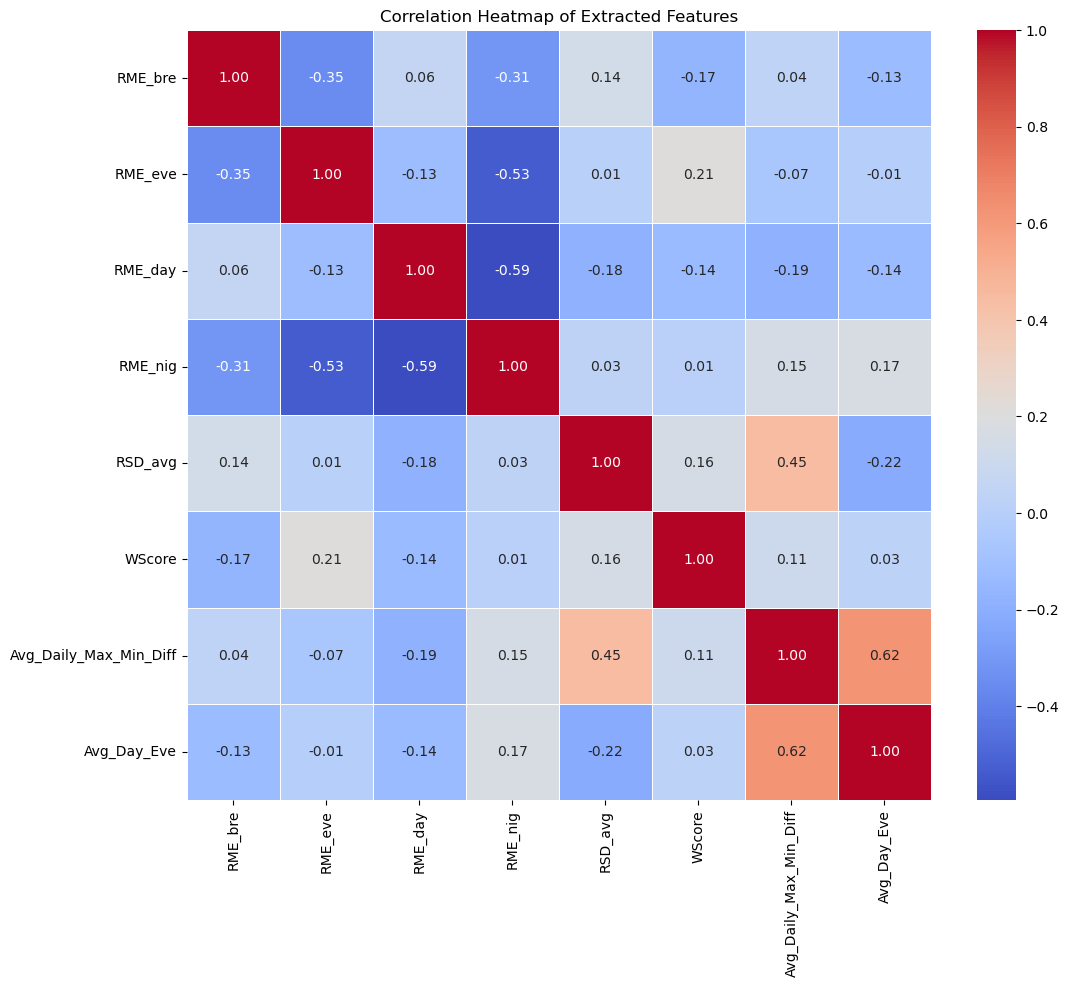

In [546]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# 1. Prepare the Data for Clustering
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
X = df100_features[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the Correlation Heatmap of Extracted Features
plt.figure(figsize=(12, 10))
corr = df100_features[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Extracted Features')
plt.show()

This next correlation heatmap includes categorical features


Lets filter only UKI (London) to get the weather out of the ecuation.

## Section 2.3 Hierarchical Clustering on features

Hierarchical Clustering with Dendrograms.



### Section 2.3.1 Hierarchical Clustering with Complete

Using method = 'complete' in linkage to be robust against outliners.

      ANON_ID  Cluster_HC
0           3          13
1           5          11
2           7          14
3           8          14
4          21           9
...       ...         ...
2344    14978          13
2346    14983          13
2347    14989          14
2348    14993          13
2349    15000          14

[2078 rows x 2 columns]
    Cluster_HC  Count
0            1     24
1            2     12
2            3      6
3            4     46
4            5     33
5            6     25
6            7     96
7            8     98
8            9    338
9           10    116
10          11    228
11          12    257
12          13    378
13          14    368
14          15      6
15          16     34
16          17     13


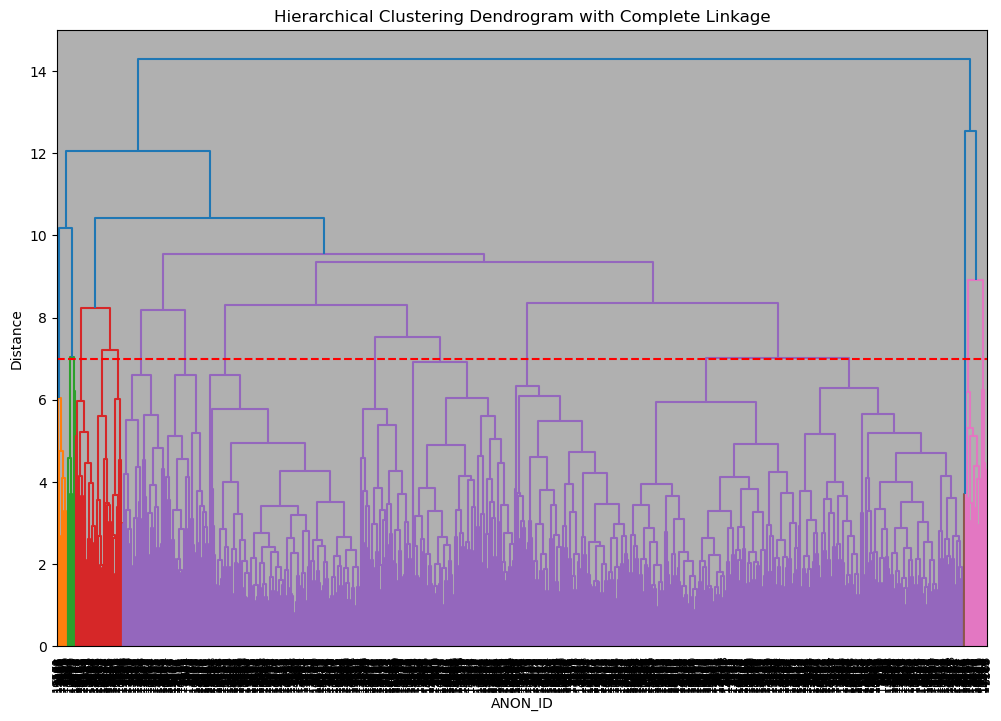

In [548]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster

# Assuming you have already standardized the data and performed hierarchical clustering
# features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'SScore', 'WScore']
# X_scaled is the standardized dataset

# Perform hierarchical clustering with complete linkage
linked = linkage(X_scaled, method='complete')

# Set the distance threshold and obtain cluster labels
distance_threshold = 7
cluster_labels = fcluster(linked, t=distance_threshold, criterion='distance')

# Add the cluster labels to the df100_features DataFrame
df100_features['Cluster_HC'] = cluster_labels

# Create a table with ANON_IDs and their assigned hierarchical cluster labels
cluster_table = df100_features[['ANON_ID', 'Cluster_HC']]

# Display the resulting table
print(cluster_table)


# Count the number of ANON_IDs per cluster
cluster_counts = df100_features['Cluster_HC'].value_counts().reset_index()
cluster_counts.columns = ['Cluster_HC', 'Count']

# Sort the clusters by Cluster_HC for better readability
cluster_counts = cluster_counts.sort_values(by='Cluster_HC').reset_index(drop=True)

# Display the resulting count table
print(cluster_counts)

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12, 8))
dendrogram(linked, labels=df100_features['ANON_ID'].values, leaf_rotation=90, leaf_font_size=8)
plt.axhline(y=distance_threshold, color='r', linestyle='--')  # Add a horizontal cut line at distance = 7
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
plt.xlabel('ANON_ID')
plt.ylabel('Distance')
plt.grid(True)
plt.show()



### Section 2.3.2 Remove the clusters that include only more than 30 ANON_IDs

Hierarchical Clustering with Dendrograms.

Using method = 'ward' in linkage to minimize variance

In [549]:
# Step 1: Identify clusters with less than 15 ANON_IDs
clusters_to_drop = cluster_counts[cluster_counts['Count'] < 20]['Cluster_HC'].tolist()
print(f"Clusters to be dropped: {clusters_to_drop}")

# Step 2: Identify ANON_IDs in those clusters
anon_ids_to_drop = df100_features[df100_features['Cluster_HC'].isin(clusters_to_drop)]['ANON_ID'].tolist()

# Step 3: Filter df100_features to exclude these ANON_IDs
df100selected = df100_features[~df100_features['ANON_ID'].isin(anon_ids_to_drop)].copy()

# Reset the index of df100selected
df100selected.reset_index(drop=True, inplace=True)

# Display information about the filtered DataFrame
print(f"Initial count of ANON_IDs: {len(df100_features['ANON_ID'])}")
print(f"Final count of ANON_IDs: {len(df100selected['ANON_ID'])}")
print(df100selected) 



Clusters to be dropped: [2, 3, 15, 17]
Initial count of ANON_IDs: 2078
Final count of ANON_IDs: 2041
      ANON_ID   RME_bre   RME_day   RME_eve   RME_nig    WScore   RSD_avg  \
0           3  0.989134  1.016322  1.240597  0.801268 -0.064648  0.501881   
1           5  1.648876  0.997713  1.251994  0.409331  0.165269  0.780249   
2           7  0.809611  0.809244  1.738360  0.676150  0.416053  0.953195   
3           8  1.413679  0.885792  1.440350  0.489552  0.234568  0.901779   
4          21  1.122629  1.181368  1.190983  0.628582 -0.029420  0.700492   
...       ...       ...       ...       ...       ...       ...       ...   
2036    14978  0.804691  1.038703  1.521987  0.660310  0.136740  0.611100   
2037    14983  1.128845  0.889766  1.067693  0.956769  0.036180  0.848479   
2038    14989  0.844510  0.905684  1.686907  0.617351  0.329459  1.061518   
2039    14993  1.108354  0.797924  1.112127  1.006947  0.114384  0.877752   
2040    15000  0.649891  1.186541  1.818058  0.40610

### Section 2.3.3 Perform Hierarchical clustering with XXXX method

Hierarchical Clustering with Dendrograms.

Using method = 'ward' in linkage to minimize variance

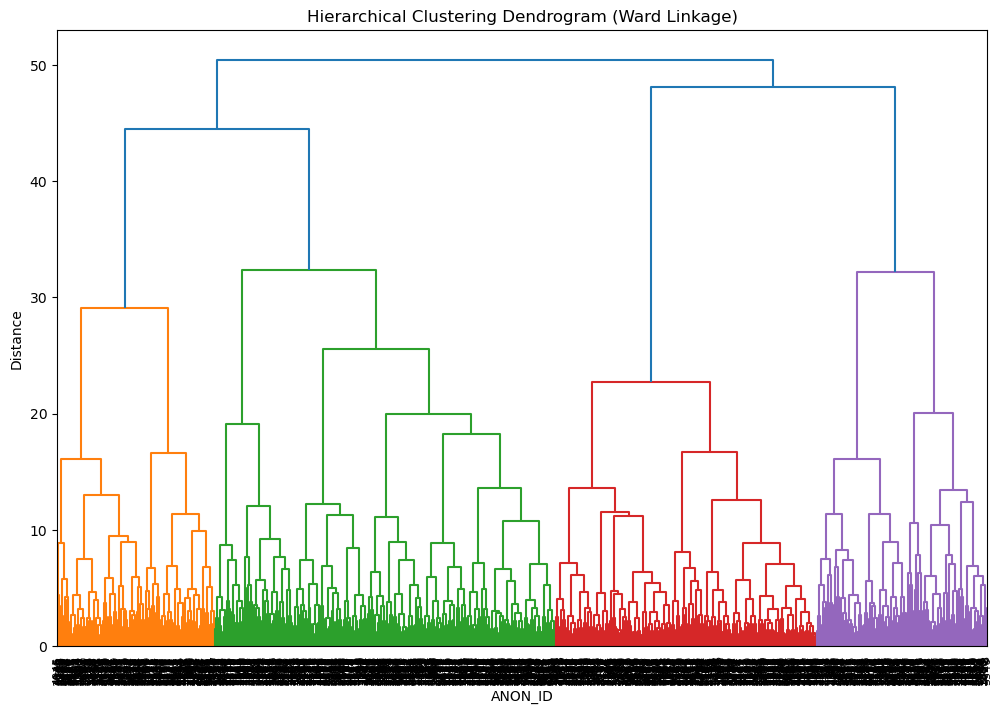

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# 1. Prepare the Data for Clustering
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
X = df100selected[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ensure labels are aligned
labels = df100selected['ANON_ID'].values

# Step 3: Perform Hierarchical Clustering using Ward Linkage
linked = linkage(X_scaled, method='ward')

# Step 4: Plot the Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    labels=labels,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('ANON_ID')
plt.ylabel('Distance')
plt.show()

## Section 3 GMM and Evaluate AIC and BIC to define the optimal amount of clusters


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

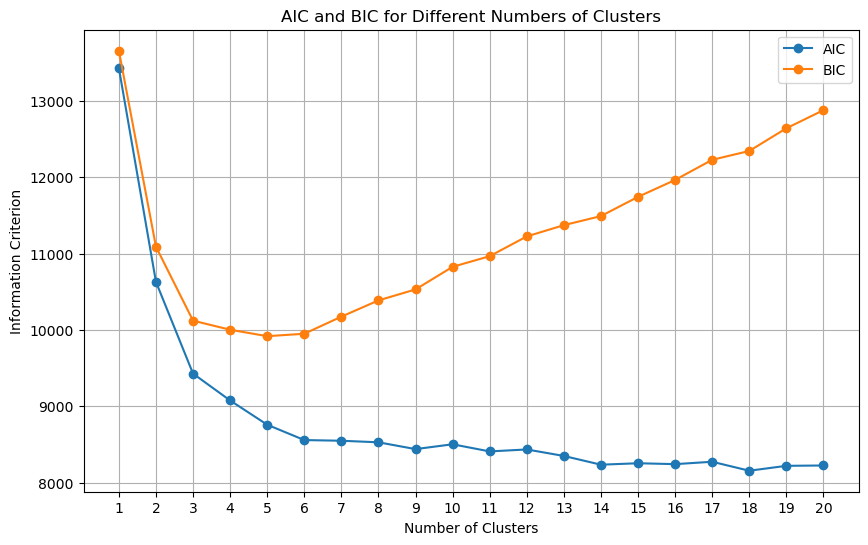

In [351]:
import os
os.environ["OMP_NUM_THREADS"] = "7"  # Adjust the number of threads if needed
 # Because Not gonna drop any ID
# Then proceed with your imports and KMeans code
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 1. Prepare the Data for Clustering
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
X = df100selected[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range for the number of clusters
cluster_range = range(1, 21)

# Lists to store AIC and BIC values
aic_values = []
bic_values = []

# Fit GMM models and calculate AIC and BIC for each number of clusters
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X_scaled)
    aic_values.append(gmm.aic(X_scaled))
    bic_values.append(gmm.bic(X_scaled))


# Plot the AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, aic_values, marker='o', label='AIC')
plt.plot(cluster_range, bic_values, marker='o', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for Different Numbers of Clusters')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 2, Silhouette Score: 0.19417622312767327
Number of Clusters: 3, Silhouette Score: 0.1691828813677308


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 4, Silhouette Score: 0.13699105682306745


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 5, Silhouette Score: 0.0887497084665452


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 6, Silhouette Score: 0.05251011307250589


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 7, Silhouette Score: 0.06683120042831639


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 8, Silhouette Score: 0.08093197559848027


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 9, Silhouette Score: 0.07262222621930542


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 10, Silhouette Score: 0.0599662804544396


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 11, Silhouette Score: 0.07543890752097443


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 12, Silhouette Score: 0.06331842023380004


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 13, Silhouette Score: 0.054932229857313976


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 14, Silhouette Score: 0.02810185888892177


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 15, Silhouette Score: 0.032526277587071675


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 16, Silhouette Score: 0.048795636576802595


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 17, Silhouette Score: 0.04197078531509197


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 18, Silhouette Score: 0.02358723812596256


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 19, Silhouette Score: 0.021156233473284488


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Number of Clusters: 20, Silhouette Score: 0.009409041010099161
    Number of Clusters  Silhouette Score
0                    2          0.194176
1                    3          0.169183
2                    4          0.136991
3                    5          0.088750
4                    6          0.052510
5                    7          0.066831
6                    8          0.080932
7                    9          0.072622
8                   10          0.059966
9                   11          0.075439
10                  12          0.063318
11                  13          0.054932
12                  14          0.028102
13                  15          0.032526
14                  16          0.048796
15                  17          0.041971
16                  18          0.023587
17                  19          0.021156
18                  20          0.009409


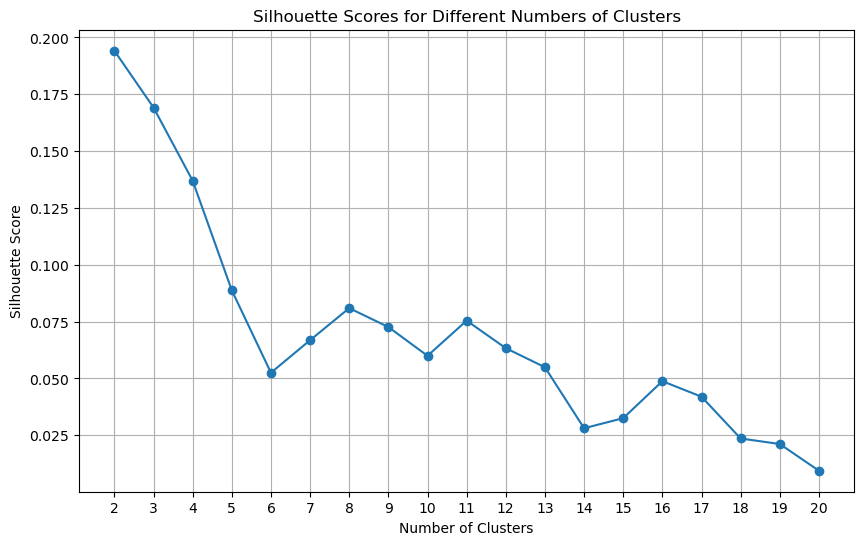

In [353]:
import os
os.environ["OMP_NUM_THREADS"] = "7"  # Adjust the number of threads if needed
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd

# Prepare the Data for Clustering
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
X = df100selected[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range for the number of clusters
cluster_range = range(2, 21)  # Start with 2 clusters (minimum valid for silhouette score)

# Initialize a list to store results
results = []

# Loop through each number of clusters
for n_clusters in cluster_range:
    # Fit the GMM model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(X_scaled)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    # Append the results
    results.append({'Number of Clusters': n_clusters, 'Silhouette Score': silhouette_avg})

    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results as a table
print(results_df)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(results_df['Number of Clusters'], results_df['Silhouette Score'], marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()



Testing Gaussianity for feature: RME_bre
Shapiro-Wilk: {'Statistic': 0.9403648516903085, 'p-value': 3.8255954618746503e-28}
Kolmogorov-Smirnov: {'Statistic': 0.07973984632640607, 'p-value': 6.114016308694075e-12}
Anderson-Darling: {'Statistic': 22.472302063811185, 'Critical Values': array([0.575, 0.655, 0.785, 0.916, 1.09 ])}

Testing Gaussianity for feature: RME_eve
Shapiro-Wilk: {'Statistic': 0.9832874949844074, 'p-value': 6.975773610352648e-15}
Kolmogorov-Smirnov: {'Statistic': 0.036884923429790134, 'p-value': 0.0068275762485346635}
Anderson-Darling: {'Statistic': 5.804601580322924, 'Critical Values': array([0.575, 0.655, 0.785, 0.916, 1.09 ])}

Testing Gaussianity for feature: RME_day
Shapiro-Wilk: {'Statistic': 0.9806487025795054, 'p-value': 3.5079040366445844e-16}
Kolmogorov-Smirnov: {'Statistic': 0.05205868823792681, 'p-value': 2.4658763328857263e-05}
Anderson-Darling: {'Statistic': 10.05081549610395, 'Critical Values': array([0.575, 0.655, 0.785, 0.916, 1.09 ])}

Testing Gauss

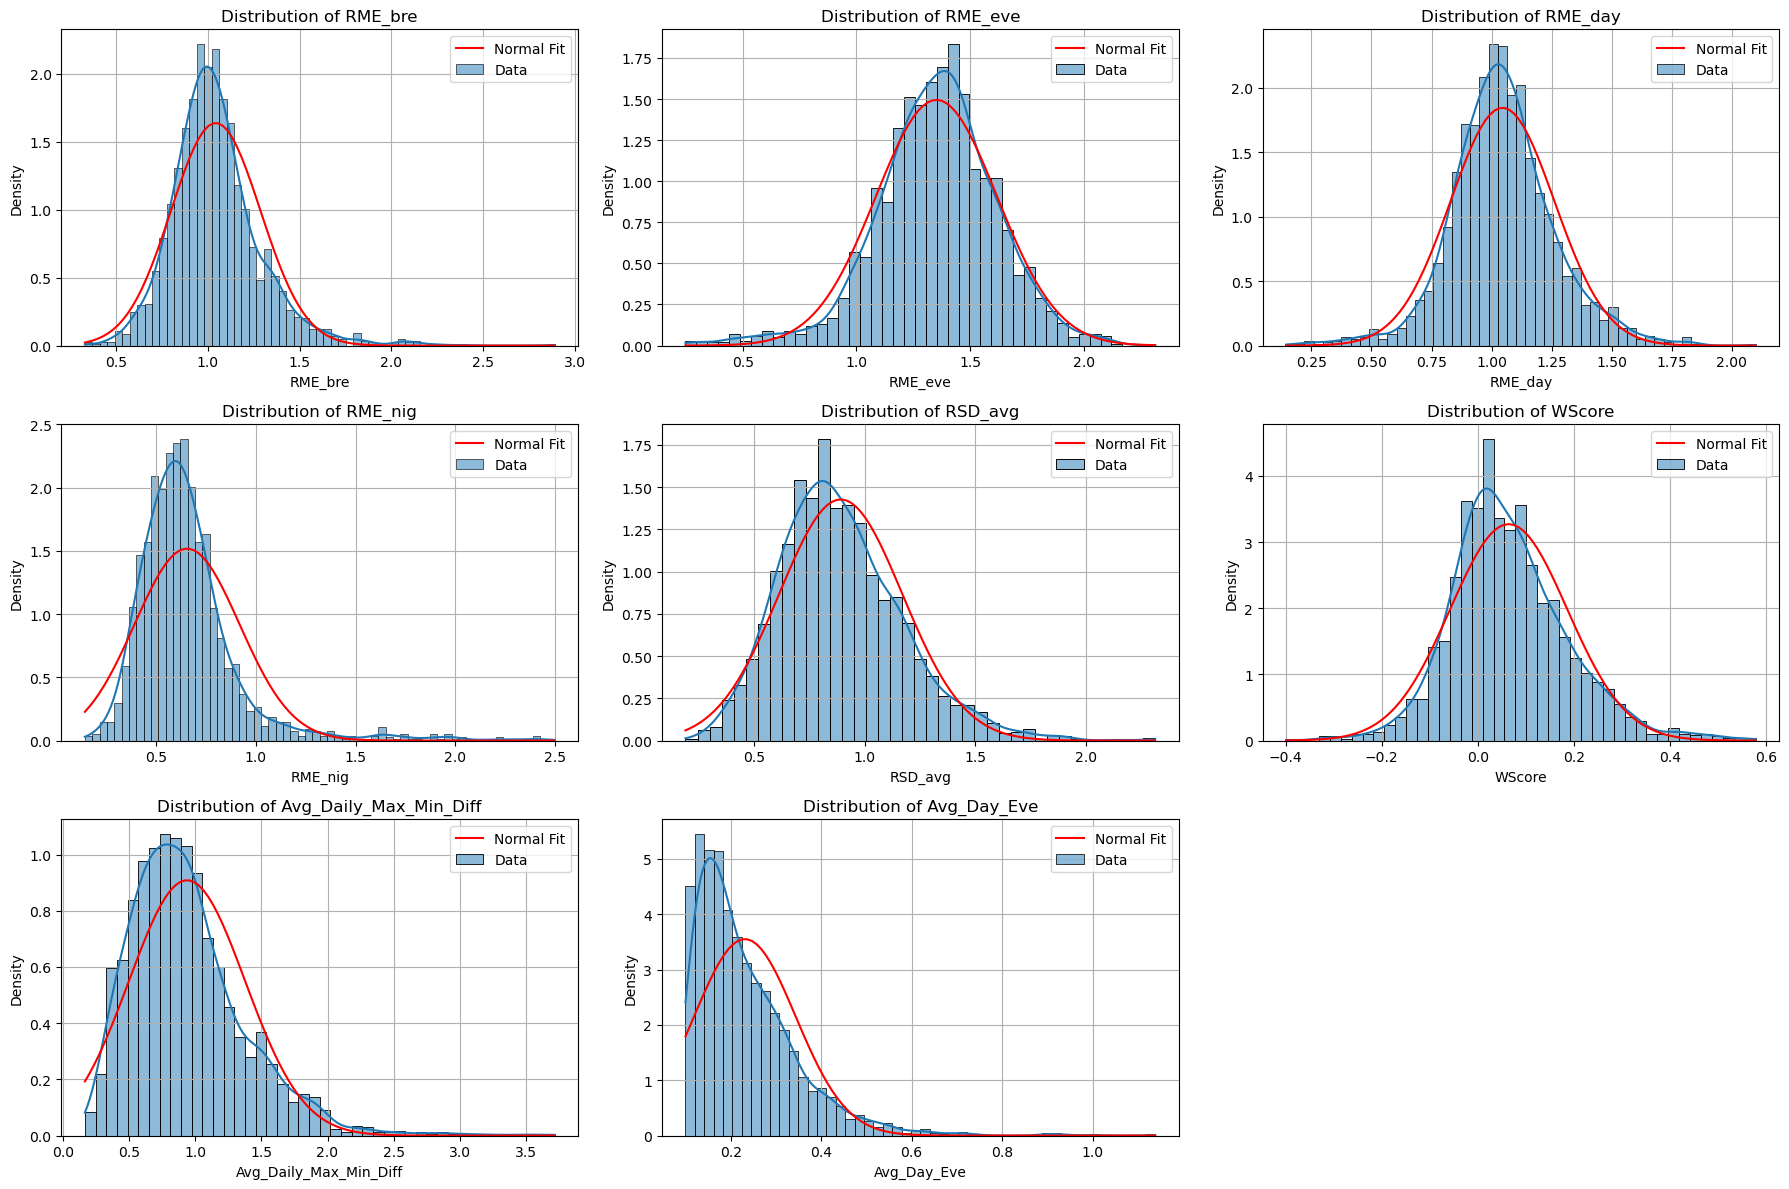

In [552]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, kstest, anderson
import matplotlib.pyplot as plt
import seaborn as sns
df100selected_features = df100_features
# Updated list of features
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']

# Example DataFrame (replace with your actual DataFrame)
X = df100selected_features[features]

# Function to test Gaussianity
def test_gaussianity(feature_data):
    results = {}

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(feature_data)
    results['Shapiro-Wilk'] = {'Statistic': shapiro_stat, 'p-value': shapiro_p}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = kstest(feature_data, 'norm', args=(feature_data.mean(), feature_data.std()))
    results['Kolmogorov-Smirnov'] = {'Statistic': ks_stat, 'p-value': ks_p}

    # Anderson-Darling Test
    anderson_result = anderson(feature_data)
    results['Anderson-Darling'] = {'Statistic': anderson_result.statistic, 'Critical Values': anderson_result.critical_values}

    return results

# Adjust grid layout based on the number of features
num_features = len(features)
rows = (num_features + 2) // 3  # Calculate number of rows for a 3-column layout
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    # Drop NaN values for the feature
    feature_data = X[feature].dropna()

    # Run Gaussianity tests
    results = test_gaussianity(feature_data)
    print(f"\nTesting Gaussianity for feature: {feature}\n{'=' * 40}")
    for test_name, result in results.items():
        print(f"{test_name}: {result}")
    
    # Plot histogram with KDE and Q-Q plot
    ax = axes[i]
    sns.histplot(feature_data, kde=True, stat="density", label="Data", ax=ax)
    x = np.linspace(feature_data.min(), feature_data.max(), 100)
    normal_curve = np.exp(-0.5 * ((x - feature_data.mean()) / feature_data.std())**2) / (feature_data.std() * np.sqrt(2 * np.pi))
    ax.plot(x, normal_curve, label="Normal Fit", color='red')
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid()

# Remove any unused axes (in case of extra grid spaces)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Notes on Gaussianity:
# Anderson-Darling Normality test: For datasets smaller than 500 entries, 
# the feature follows a normal distribution when the statistic is less than 0.6.


### Section 2.3.5 Get table with count of ANON_ID per cluster

Now that I identified that 6 is the optimal number of clusters, lets fit the GMM and see how many IDs per cluster, and their attributes

# FIT THE MODEL WITH SOME FEATURES

In [554]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the reduced set of features for clustering
features_reduced = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'Avg_Day_Eve']
df100selected_features_reduced = df100selected

# Prepare the data for clustering
X_reduced = df100selected_features_reduced[features_reduced]

# Scale the data
scaler_reduced = StandardScaler()
X_scaled_reduced = scaler_reduced.fit_transform(X_reduced)

# Fit the Gaussian Mixture Model
gmm_reduced = GaussianMixture(n_components=10, random_state=42)
df100selected_features_reduced['Cluster'] = gmm_reduced.fit_predict(X_scaled_reduced)

# Count the number of consumers per cluster
cluster_counts_reduced = df100selected_features_reduced['Cluster'].value_counts().reset_index()
cluster_counts_reduced.columns = ['Cluster', 'Number_of_Consumers']

# Sort the clusters for better readability
cluster_counts_reduced = cluster_counts_reduced.sort_values(by='Cluster').reset_index(drop=True)

# Display the cluster counts
print(cluster_counts_reduced)


   Cluster  Number_of_Consumers
0        0                   55
1        1                  232
2        2                  470
3        3                   58
4        4                   11
5        5                  159
6        6                  872
7        7                   93
8        8                   85
9        9                    6


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [556]:
# Define attributes for cluster analysis (reduced set)
selected_attributes_reduced = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'Avg_Day_Eve']

# Group by Cluster and calculate the mean for each attribute
cluster_means_reduced = df100selected_features_reduced.groupby('Cluster')[selected_attributes_reduced].mean().reset_index()

# Round to 2 decimal places
cluster_means_reduced = cluster_means_reduced.round(2)

# Apply color scale using Pandas Styler
def apply_color_scale_reduced(df):
    return df.style.background_gradient(cmap="coolwarm", axis=0).format(precision=2)

# Apply the color scale to the DataFrame
styled_cluster_means_reduced = apply_color_scale_reduced(cluster_means_reduced)

# Display the styled DataFrame
styled_cluster_means_reduced


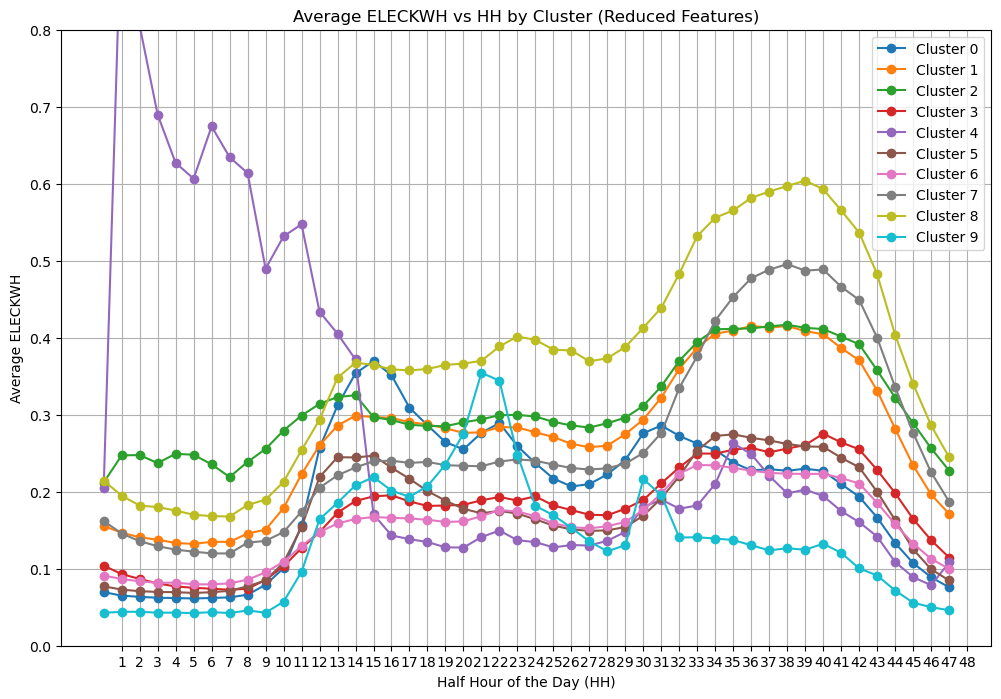

In [558]:
import matplotlib.pyplot as plt

# Ensure 'HH' and 'ELECKWH' columns are in the dataframe
if 'HH' not in df100.columns or 'ELECKWH' not in df100.columns:
    raise KeyError("The dataframe must contain 'HH' and 'ELECKWH' columns.")

# Merge cluster information back into the original data (if not already included)
df_with_clusters_reduced = df100.merge(
    df100selected_features_reduced[['ANON_ID', 'Cluster']],
    on='ANON_ID',
    how='inner'
)

# Group by Cluster and HH, and calculate the mean ELECKWH
clustered_means_reduced = df_with_clusters_reduced.groupby(['Cluster', 'HH'])['ELECKWH'].mean().reset_index()

# Plot each cluster
plt.figure(figsize=(12, 8))
for cluster in clustered_means_reduced['Cluster'].unique():
    cluster_data_reduced = clustered_means_reduced[clustered_means_reduced['Cluster'] == cluster]
    plt.plot(cluster_data_reduced['HH'], cluster_data_reduced['ELECKWH'], label=f'Cluster {cluster}', marker='o')

# Plot details
plt.title('Average ELECKWH vs HH by Cluster (Reduced Features)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.ylim(0,0.8)
plt.grid(True)
plt.show()


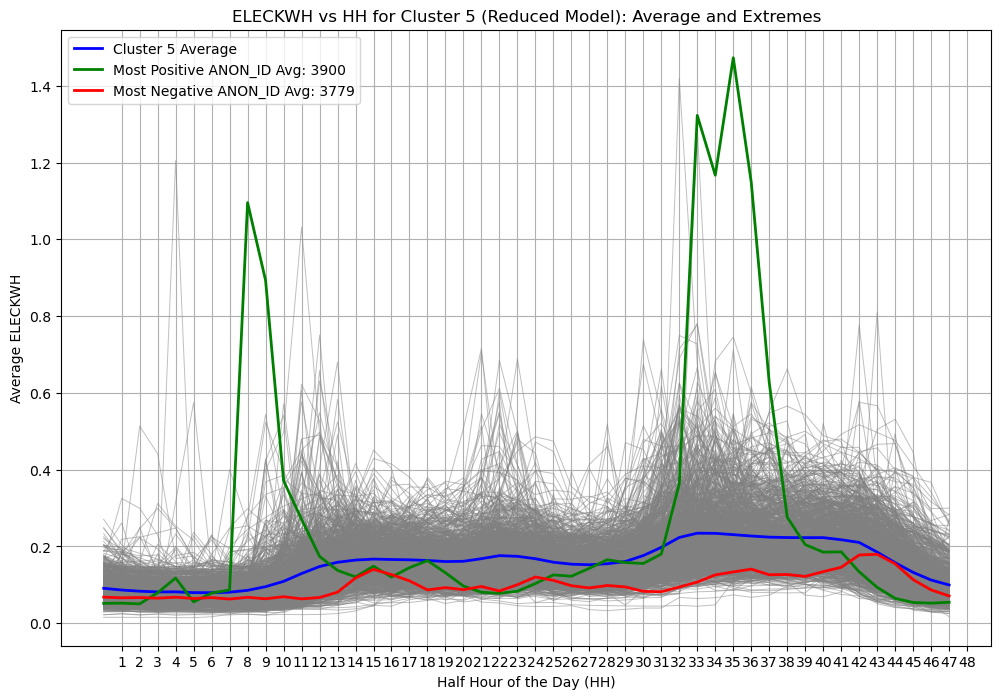

Features Table for Cluster 5 and Selected ANON_IDs:
                  RME_bre   RME_eve   RME_day   RME_nig  Avg_Day_Eve
ANON_ID                                                             
Cluster_Average  1.292373  1.418103  0.978790  0.507939     0.174224
3900             0.498613  2.078043  0.531759  0.812991     0.276019
3779             1.010500  1.394348  0.961233  0.708860     0.100196


In [562]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 5 in the reduced model
cluster_5_data_reduced = df_with_clusters_reduced[df_with_clusters_reduced['Cluster'] == 6]

# Calculate the average ELECKWH per HH for each ANON_ID in Cluster 5
cluster_5_avg_by_anon_reduced = (
    cluster_5_data_reduced.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Calculate the cluster average ELECKWH per HH
cluster_5_avg_reduced = (
    cluster_5_avg_by_anon_reduced.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge the cluster average back with the individual ANON_ID data
cluster_5_data_reduced = cluster_5_data_reduced.merge(cluster_5_avg_reduced, on='HH', how='left')

# Calculate the absolute difference from the cluster average for each ANON_ID
cluster_5_data_reduced['Difference'] = cluster_5_data_reduced['ELECKWH'] - cluster_5_data_reduced['Cluster_Avg_ELECKWH']

# Calculate the mean difference per ANON_ID
anon_diff_reduced = (
    cluster_5_data_reduced.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative differences
most_positive_anon_reduced = anon_diff_reduced.loc[anon_diff_reduced['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon_reduced = anon_diff_reduced.loc[anon_diff_reduced['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the identified ANON_IDs
positive_anon_data_reduced = (
    cluster_5_avg_by_anon_reduced[cluster_5_avg_by_anon_reduced['ANON_ID'] == most_positive_anon_reduced]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data_reduced = (
    cluster_5_avg_by_anon_reduced[cluster_5_avg_by_anon_reduced['ANON_ID'] == most_negative_anon_reduced]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot all ANON_IDs in grey
for anon_id in cluster_5_avg_by_anon_reduced['ANON_ID'].unique():
    anon_data = cluster_5_avg_by_anon_reduced[cluster_5_avg_by_anon_reduced['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.5, linewidth=0.7)

# Plot the cluster average in blue
plt.plot(
    cluster_5_avg_reduced['HH'], cluster_5_avg_reduced['Cluster_Avg_ELECKWH'],
    color='blue', linewidth=2, label='Cluster 5 Average'
)

# Plot the most positive ANON_ID in green
plt.plot(
    positive_anon_data_reduced['HH'], positive_anon_data_reduced['ELECKWH'],
    color='green', linewidth=2, label=f'Most Positive ANON_ID Avg: {most_positive_anon_reduced}'
)

# Plot the most negative ANON_ID in red
plt.plot(
    negative_anon_data_reduced['HH'], negative_anon_data_reduced['ELECKWH'],
    color='red', linewidth=2, label=f'Most Negative ANON_ID Avg: {most_negative_anon_reduced}'
)

# Plot details
plt.title('ELECKWH vs HH for Cluster 5 (Reduced Model): Average and Extremes')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()



# Prepare a DataFrame to store the features for the cluster and selected ANON_IDs
table_data = {}

# Add cluster-wide average features
table_data['Cluster_Average'] = (
    df100selected_features_reduced[df100selected_features_reduced['Cluster'] == 5][features_reduced]
    .mean()
    .to_dict()
)

# Add features for the most positive ANON_ID
table_data[most_positive_anon_reduced] = (
    df100selected_features_reduced[df100selected_features_reduced['ANON_ID'] == most_positive_anon_reduced][features_reduced]
    .mean()
    .to_dict()
)

# Add features for the most negative ANON_ID
table_data[most_negative_anon_reduced] = (
    df100selected_features_reduced[df100selected_features_reduced['ANON_ID'] == most_negative_anon_reduced][features_reduced]
    .mean()
    .to_dict()
)

# Convert the dictionary to a DataFrame
table_df = pd.DataFrame(table_data)

# Transpose the DataFrame to match the desired format
table_df = table_df.T
table_df.index.name = 'ANON_ID'

# Display the resulting table
print("Features Table for Cluster 5 and Selected ANON_IDs:")
print(table_df)




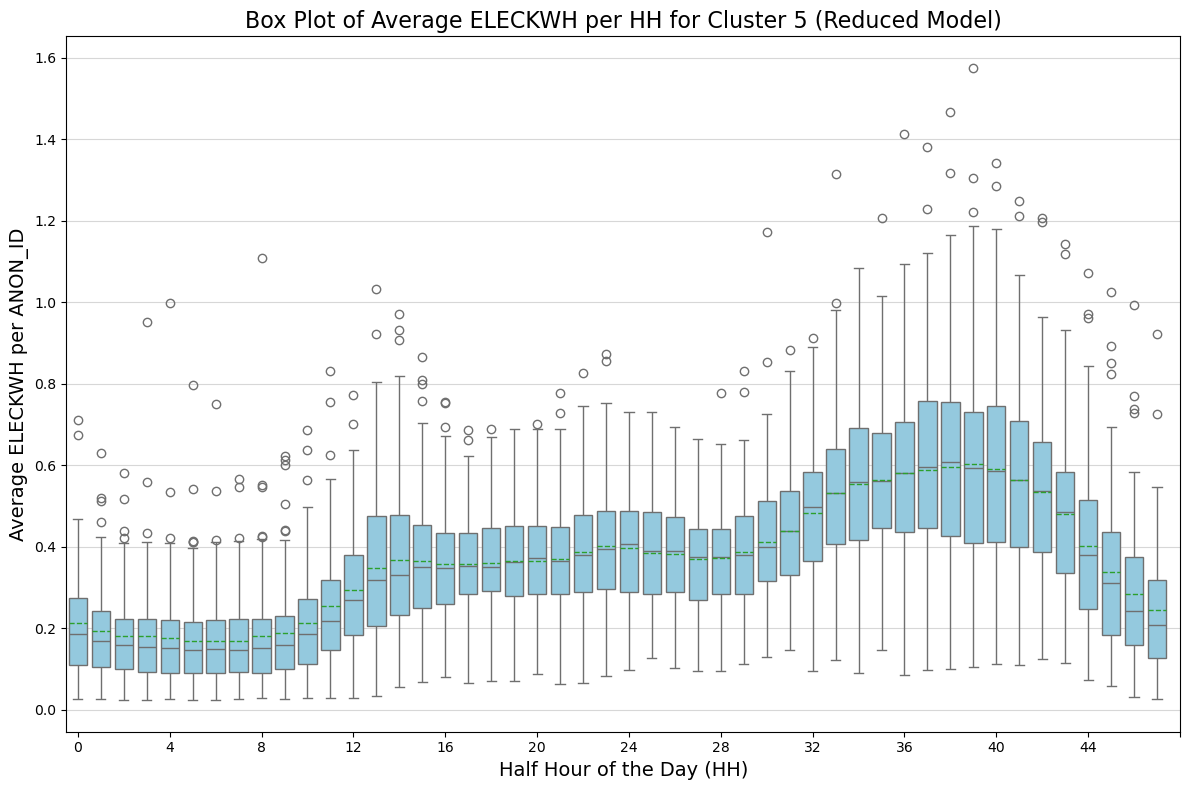

In [568]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Cluster 5 in the reduced model
cluster_5_data_reduced = df_with_clusters_reduced[df_with_clusters_reduced['Cluster'] == 8]

# Calculate the average ELECKWH per HH for each ANON_ID
avg_eleckwh_per_hh_anon = (
    cluster_5_data_reduced.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the box plot for ELECKWH grouped by HH
plt.figure(figsize=(12, 8))
sns.boxplot(data=avg_eleckwh_per_hh_anon, x='HH', y='ELECKWH', color='skyblue', showmeans=True, meanline=True)

# Plot details
plt.title('Box Plot of Average ELECKWH per HH for Cluster YY (Reduced Model)', fontsize=16)
plt.xlabel('Half Hour of the Day (HH)', fontsize=14)
plt.ylabel('Average ELECKWH per ANON_ID', fontsize=14)
plt.xticks(range(0, 49, 4))  # Adjust the ticks for better readability
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()



# FIT THE MODEL WITH SOME FEATURES + RSD

In [598]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the reduced set of features for clustering
features_reduced = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'Avg_Day_Eve', 'RSD_avg']
df100selected_features_reduced_02 = df100selected

# Prepare the data for clustering
X_reduced = df100selected_features_reduced_02[features_reduced]

# Scale the data
scaler_reduced = StandardScaler()
X_scaled_reduced = scaler_reduced.fit_transform(X_reduced)

# Fit the Gaussian Mixture Model
gmm_reduced = GaussianMixture(n_components=15, random_state=42)
df100selected_features_reduced_02['Cluster'] = gmm_reduced.fit_predict(X_scaled_reduced)

# Count the number of consumers per cluster
cluster_counts_reduced = df100selected_features_reduced_02['Cluster'].value_counts().reset_index()
cluster_counts_reduced.columns = ['Cluster', 'Number_of_Consumers']

# Sort the clusters for better readability
cluster_counts_reduced = cluster_counts_reduced.sort_values(by='Cluster').reset_index(drop=True)

# Define attributes for cluster analysis (reduced set)
selected_attributes_reduced = features_reduced

# Group by Cluster and calculate the mean for each attribute
cluster_means_reduced_02 = df100selected_features_reduced_02.groupby('Cluster')[selected_attributes_reduced].mean().reset_index()

# Round to 2 decimal places
cluster_means_reduced_02 = cluster_means_reduced_02.round(2)

# Merge the cluster counts into the cluster means
cluster_summary_reduced = cluster_means_reduced_02.merge(cluster_counts_reduced, on='Cluster')

# Apply color scale using Pandas Styler
def apply_color_scale_reduced(df):
    # Apply different color scales for features and the count column
    styled = df.style.background_gradient(cmap="coolwarm", subset=selected_attributes_reduced, axis=0)
    styled = styled.background_gradient(cmap="coolwarm", subset=['Number_of_Consumers'], axis=0)
    return styled.format(precision=2)

# Apply the color scale to the DataFrame
styled_cluster_summary_reduced = apply_color_scale_reduced(cluster_summary_reduced)

# Display the styled DataFrame
styled_cluster_summary_reduced


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


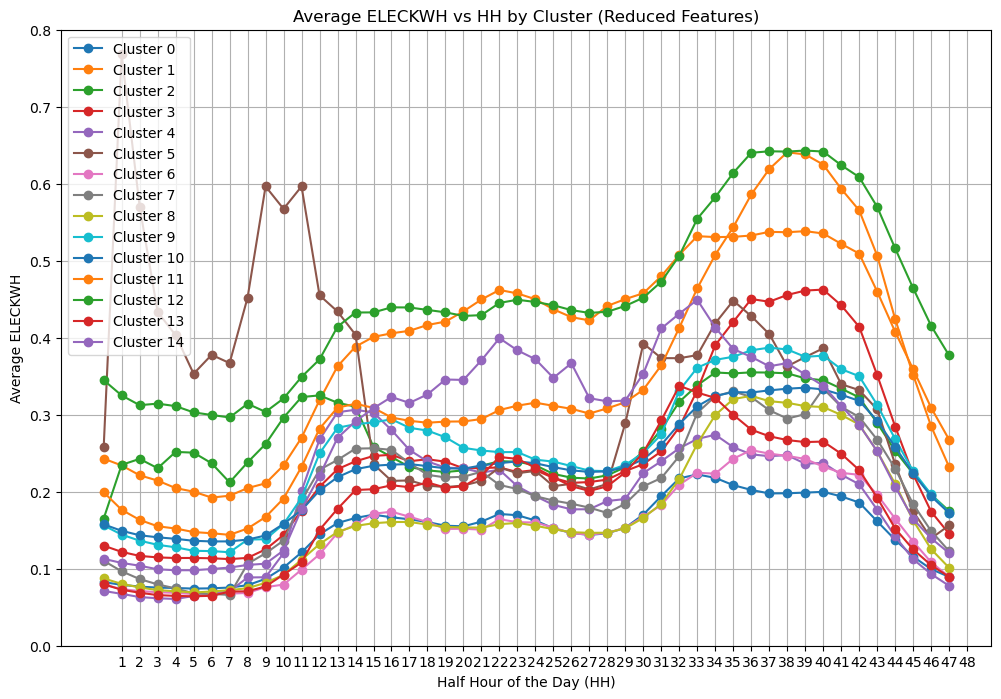

In [600]:
import matplotlib.pyplot as plt

# Ensure 'HH' and 'ELECKWH' columns are in the dataframe
if 'HH' not in df100.columns or 'ELECKWH' not in df100.columns:
    raise KeyError("The dataframe must contain 'HH' and 'ELECKWH' columns.")

# Merge cluster information back into the original data (if not already included)
df_with_clusters_reduced = df100.merge(
    df100selected_features_reduced_02[['ANON_ID', 'Cluster']],
    on='ANON_ID',
    how='inner'
)

# Group by Cluster and HH, and calculate the mean ELECKWH
clustered_means_reduced = df_with_clusters_reduced.groupby(['Cluster', 'HH'])['ELECKWH'].mean().reset_index()

# Plot each cluster
plt.figure(figsize=(12, 8))
for cluster in clustered_means_reduced['Cluster'].unique():
    cluster_data_reduced = clustered_means_reduced[clustered_means_reduced['Cluster'] == cluster]
    plt.plot(cluster_data_reduced['HH'], cluster_data_reduced['ELECKWH'], label=f'Cluster {cluster}', marker='o')

# Plot details
plt.title('Average ELECKWH vs HH by Cluster (Reduced Features)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.ylim(0,0.8)
plt.grid(True)
plt.show()


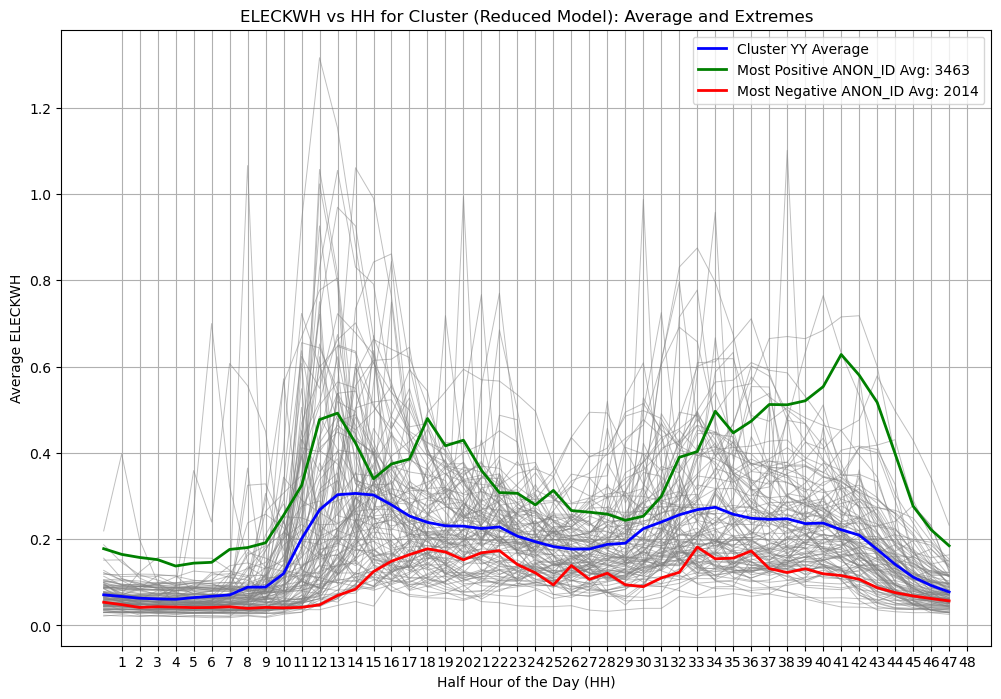

Features Table for Cluster  4 and Selected ANON_IDs:
                 RME_bre  RME_eve  RME_day  RME_nig  Avg_Day_Eve  RSD_avg
ANON_ID                                                                  
Cluster_Average     1.42     1.21     1.14     0.47         0.19     1.33
3463                1.25     1.48     0.87     0.57         0.35     1.08
2014                1.24     1.27     1.21     0.46         0.10     1.35


In [626]:
import matplotlib.pyplot as plt
cluster_02 = 4
# Filter the data for Cluster 5 in the reduced model
cluster_5_data_reduced = df_with_clusters_reduced[df_with_clusters_reduced['Cluster'] == cluster_02]

# Calculate the average ELECKWH per HH for each ANON_ID in Cluster 5
cluster_5_avg_by_anon_reduced = (
    cluster_5_data_reduced.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Calculate the cluster average ELECKWH per HH
cluster_5_avg_reduced = (
    cluster_5_avg_by_anon_reduced.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge the cluster average back with the individual ANON_ID data
cluster_5_data_reduced = cluster_5_data_reduced.merge(cluster_5_avg_reduced, on='HH', how='left')

# Calculate the absolute difference from the cluster average for each ANON_ID
cluster_5_data_reduced['Difference'] = cluster_5_data_reduced['ELECKWH'] - cluster_5_data_reduced['Cluster_Avg_ELECKWH']

# Calculate the mean difference per ANON_ID
anon_diff_reduced = (
    cluster_5_data_reduced.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative differences
most_positive_anon_reduced = anon_diff_reduced.loc[anon_diff_reduced['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon_reduced = anon_diff_reduced.loc[anon_diff_reduced['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the identified ANON_IDs
positive_anon_data_reduced = (
    cluster_5_avg_by_anon_reduced[cluster_5_avg_by_anon_reduced['ANON_ID'] == most_positive_anon_reduced]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data_reduced = (
    cluster_5_avg_by_anon_reduced[cluster_5_avg_by_anon_reduced['ANON_ID'] == most_negative_anon_reduced]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot all ANON_IDs in grey
for anon_id in cluster_5_avg_by_anon_reduced['ANON_ID'].unique():
    anon_data = cluster_5_avg_by_anon_reduced[cluster_5_avg_by_anon_reduced['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.5, linewidth=0.7)

# Plot the cluster average in blue
plt.plot(
    cluster_5_avg_reduced['HH'], cluster_5_avg_reduced['Cluster_Avg_ELECKWH'],
    color='blue', linewidth=2, label='Cluster YY Average'
)

# Plot the most positive ANON_ID in green
plt.plot(
    positive_anon_data_reduced['HH'], positive_anon_data_reduced['ELECKWH'],
    color='green', linewidth=2, label=f'Most Positive ANON_ID Avg: {most_positive_anon_reduced}'
)

# Plot the most negative ANON_ID in red
plt.plot(
    negative_anon_data_reduced['HH'], negative_anon_data_reduced['ELECKWH'],
    color='red', linewidth=2, label=f'Most Negative ANON_ID Avg: {most_negative_anon_reduced}'
)

# Plot details
plt.title('ELECKWH vs HH for Cluster (Reduced Model): Average and Extremes')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()



# Prepare a DataFrame to store the features for the cluster and selected ANON_IDs
table_data = {}

# Add cluster-wide average features
table_data['Cluster_Average'] = (
    df100selected_features_reduced_02[df100selected_features_reduced_02['Cluster'] == cluster_02][features_reduced]
    .mean()
    .to_dict()
)

# Add features for the most positive ANON_ID
table_data[most_positive_anon_reduced] = (
    df100selected_features_reduced_02[df100selected_features_reduced_02['ANON_ID'] == most_positive_anon_reduced][features_reduced]
    .mean()
    .to_dict()
)

# Add features for the most negative ANON_ID
table_data[most_negative_anon_reduced] = (
    df100selected_features_reduced_02[df100selected_features_reduced_02['ANON_ID'] == most_negative_anon_reduced][features_reduced]
    .mean()
    .to_dict()
)

# Convert the dictionary to a DataFrame
table_df = pd.DataFrame(table_data)
table_df = table_df.round(2)
# Transpose the DataFrame to match the desired format
table_df = table_df.T
table_df.index.name = 'ANON_ID'

# Display the resulting table
print("Features Table for Cluster ", cluster_02 ,"and Selected ANON_IDs:")
print(table_df)




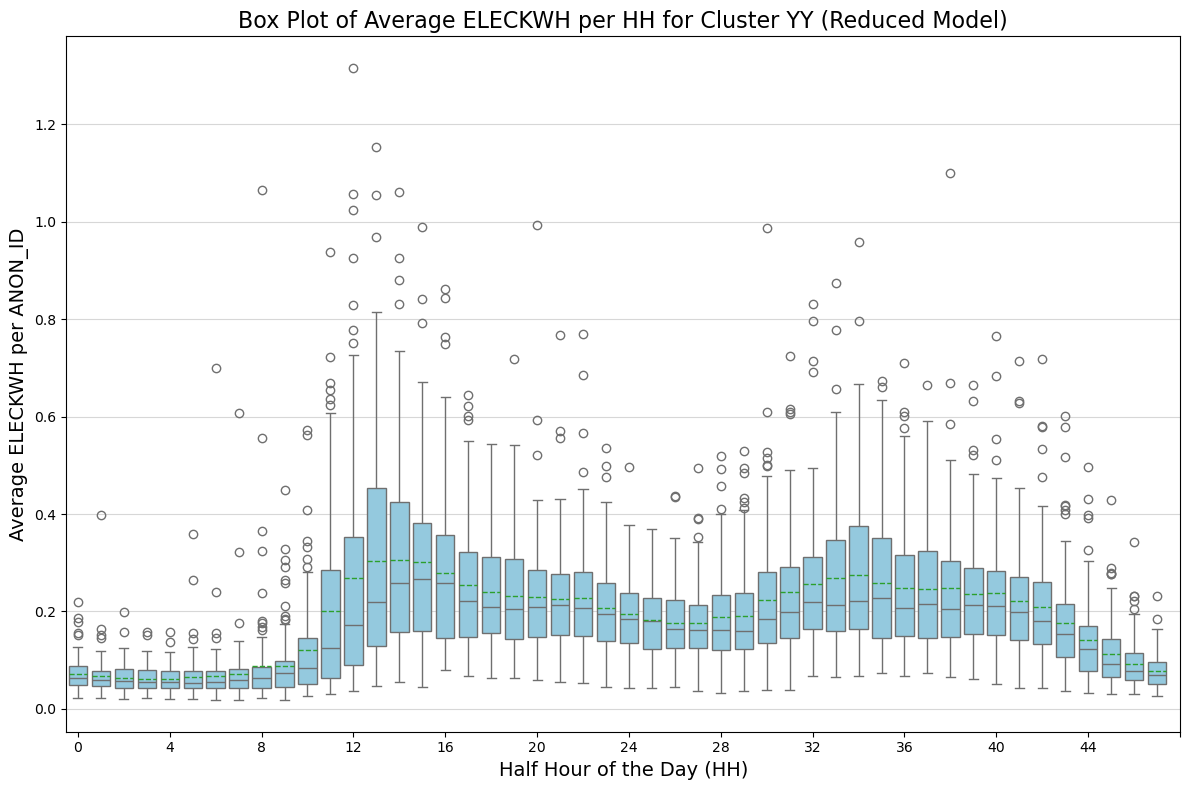

In [628]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Cluster 5 in the reduced model
cluster_5_data_reduced = df_with_clusters_reduced[df_with_clusters_reduced['Cluster'] == cluster_02]

# Calculate the average ELECKWH per HH for each ANON_ID
avg_eleckwh_per_hh_anon = (
    cluster_5_data_reduced.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the box plot for ELECKWH grouped by HH
plt.figure(figsize=(12, 8))
sns.boxplot(data=avg_eleckwh_per_hh_anon, x='HH', y='ELECKWH', color='skyblue', showmeans=True, meanline=True)

# Plot details
plt.title('Box Plot of Average ELECKWH per HH for Cluster YY (Reduced Model)', fontsize=16)
plt.xlabel('Half Hour of the Day (HH)', fontsize=14)
plt.ylabel('Average ELECKWH per ANON_ID', fontsize=14)
plt.xticks(range(0, 49, 4))  # Adjust the ticks for better readability
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()



# FIT THE MODEL WITH BEST FEATURES

In [387]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd
df100selected_features = df100selected
# 1. Prepare the Data for Clustering
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
X = df100selected[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Gaussian Mixture Model with 6 clusters
gmm = GaussianMixture(n_components=10, random_state=42)  # INPUT THE OPTIMAL NUMBER OF CLUSTERS
df100selected_features['Cluster'] = gmm.fit_predict(X_scaled)

# Count the number of consumers per cluster
cluster_counts = df100selected_features['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Number_of_Consumers']

# Sort the clusters for better readability
cluster_counts = cluster_counts.sort_values(by='Cluster').reset_index(drop=True)

# Display the cluster counts
print(cluster_counts)


   Cluster  Number_of_Consumers
0        0                   45
1        1                  239
2        2                  418
3        3                  207
4        4                  109
5        5                   73
6        6                  147
7        7                   24
8        8                   30
9        9                   14


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


### Section 2.3.6 Get table with the mean value of the features per Cluster

In [389]:
# Define the selected attributes for which we want to calculate the mean
# selected_attributes = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'SScore', 'WScore']
selected_attributes = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
# Group by Cluster and calculate the mean for each attribute
cluster_means = df100selected_features.groupby('Cluster')[selected_attributes].mean().reset_index()
cluster_means = cluster_means.round(2)
# Display the resulting DataFrame
cluster_means


Cluster  RME_bre  RME_eve  RME_day  RME_nig  RSD_avg  WScore  \
0        0     0.94     1.04     0.89     1.09     0.98    0.04   
1        1     1.19     1.30     1.03     0.63     1.04    0.04   
2        2     1.04     1.33     1.17     0.57     0.79    0.04   
3        3     1.04     1.26     1.07     0.71     0.61    0.00   
4        4     0.83     1.63     0.94     0.65     0.98    0.26   
5        5     1.13     1.36     1.21     0.46     1.21   -0.02   
6        6     1.01     1.39     1.07     0.63     0.80    0.06   
7        7     1.08     1.07     1.50     0.49     1.06    0.01   
8        8     1.56     1.16     1.07     0.48     1.12    0.03   
9        9     0.84     1.53     1.03     0.64     0.92    0.08   

   Avg_Daily_Max_Min_Diff  Avg_Day_Eve  
0                    1.14         0.25  
1                    0.65         0.12  
2                    0.81         0.21  
3                    0.35         0.12  
4                    0.85         0.18  
5                    1.07         0.16  
6                    1.39         0.38  
7                    0.71         0.11  
8                    1.79         0.28  
9                    0.69         0.15

In [391]:
# Define the selected attributes for which we want to calculate the mean
selected_attributes = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']

# Group by Cluster and calculate the mean for each attribute
cluster_means = df100selected_features.groupby('Cluster')[selected_attributes].mean().reset_index()

# Round to 2 decimal places
cluster_means = cluster_means.round(2)

# Apply color scale using Pandas Styler
def apply_color_scale(df):
    return df.style.background_gradient(cmap="coolwarm", axis=0).format(precision=2)

# Apply the color scale to the DataFrame
styled_cluster_means = apply_color_scale(cluster_means)

# Display the styled DataFrame
styled_cluster_means



## PCA Analysis


[0.24855841 0.20540627]


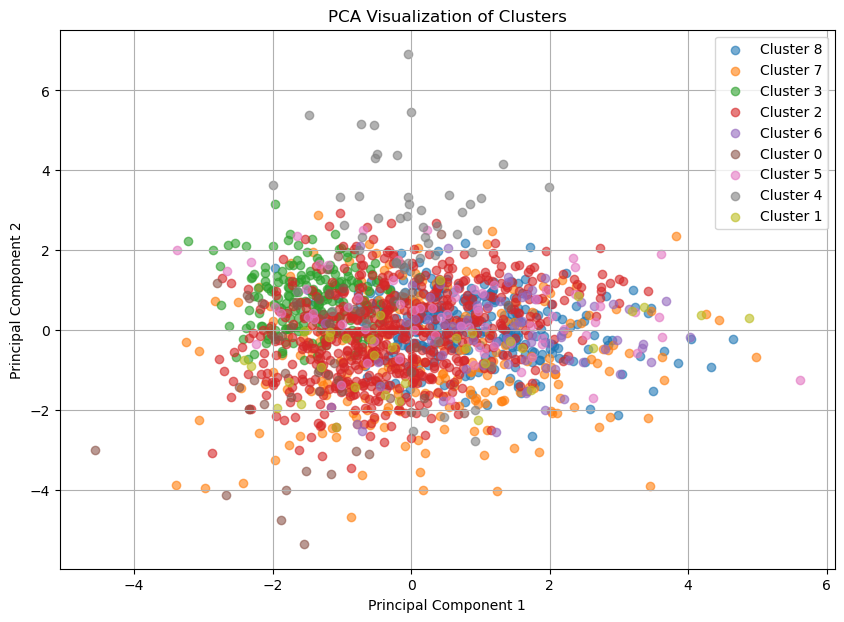

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the selected features for PCA
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
X = df100selected_features[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and the cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df100selected_features['Cluster']

# Plot the PCA-transformed data with cluster labels
plt.figure(figsize=(10, 7))
for cluster in df_pca['Cluster'].unique():
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster]['PCA1'],
        df_pca[df_pca['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )
print(pca.explained_variance_ratio_)


# Add plot details
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


### Section 2.3.7 PCA w 2 components to evaluate the disimilarity of selected clusters

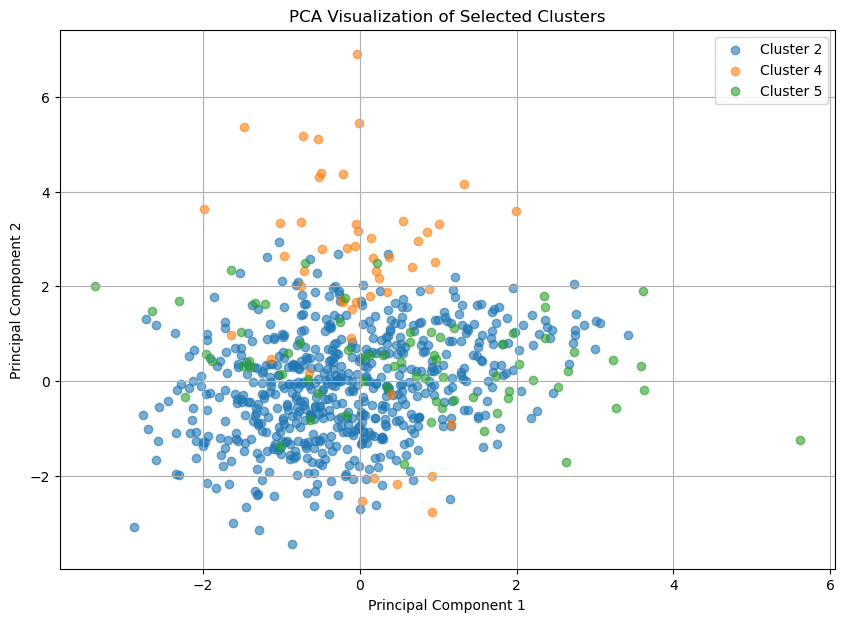

In [59]:
import matplotlib.pyplot as plt

# Filter the DataFrame to keep only clusters 1, 2, 4, and 7
clusters_to_plot = [2, 4, 5]
df_pca_filtered = df_pca[df_pca['Cluster'].isin(clusters_to_plot)]

# Plot the PCA-transformed data with the specified cluster labels
plt.figure(figsize=(10, 7))
for cluster in clusters_to_plot:
    plt.scatter(
        df_pca_filtered[df_pca_filtered['Cluster'] == cluster]['PCA1'],
        df_pca_filtered[df_pca_filtered['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

# Add plot details
plt.title('PCA Visualization of Selected Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## Results analysis

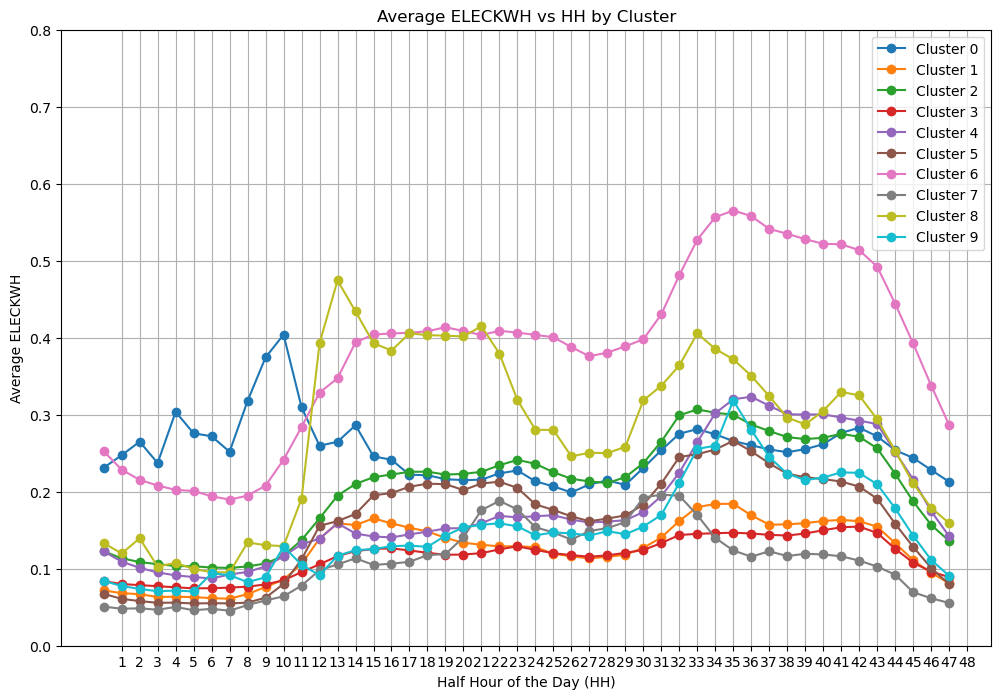

In [393]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'HH' and 'ELECKWH' columns are in the dataframe
if 'HH' not in df100.columns or 'ELECKWH' not in df100.columns:
    raise KeyError("The dataframe must contain 'HH' and 'ELECKWH' columns.")

# Merge cluster information back into the original data (if not already included)
df_with_clusters = df100.merge(
    df100selected_features[['ANON_ID', 'Cluster']],
    on='ANON_ID',
    how='inner'
)

# Group by Cluster and HH, and calculate the mean ELECKWH
clustered_means = df_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH'].mean().reset_index()

# Plot each cluster
plt.figure(figsize=(12, 8))
for cluster in clustered_means['Cluster'].unique():
    cluster_data = clustered_means[clustered_means['Cluster'] == cluster]
    plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster}', marker='o')

# Plot details
plt.title('Average ELECKWH vs HH by Cluster')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.ylim(0,0.8)
plt.grid(True)
plt.show()


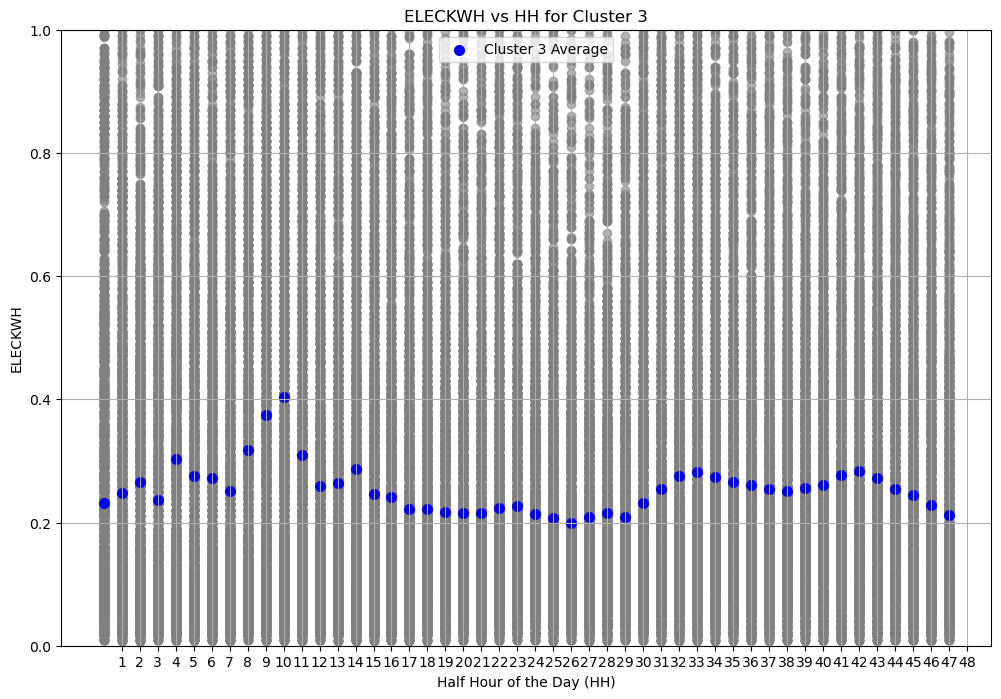

In [367]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 3
cluster_3_data = df_with_clusters[df_with_clusters['Cluster'] == 0]

# Plot all ANON_IDs in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_data['ANON_ID'].unique():
    anon_data = cluster_3_data[cluster_3_data['ANON_ID'] == anon_id]
    plt.scatter(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Calculate the average ELECKWH for Cluster 3 by HH
cluster_3_avg = cluster_3_data.groupby('HH')['ELECKWH'].mean().reset_index()

# Plot the average for Cluster 3 in blue
plt.scatter(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.ylim(0,1)
plt.grid(True)
plt.show()


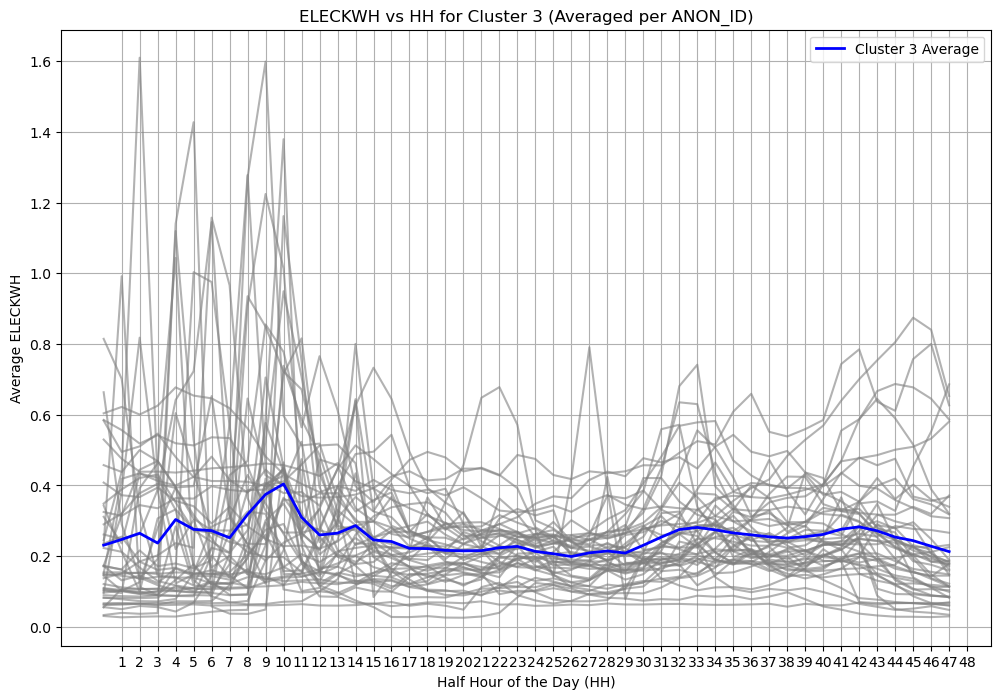

In [369]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 3
cluster_3_data = df_with_clusters[df_with_clusters['Cluster'] == 0]

# Calculate the average ELECKWH per HH for each ANON_ID
cluster_3_avg_by_anon = (
    cluster_3_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot all ANON_IDs in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_3_avg_by_anon[cluster_3_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Calculate the cluster average ELECKWH per HH
cluster_3_avg = (
    cluster_3_avg_by_anon.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the cluster average in blue
plt.plot(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3 (Averaged per ANON_ID)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


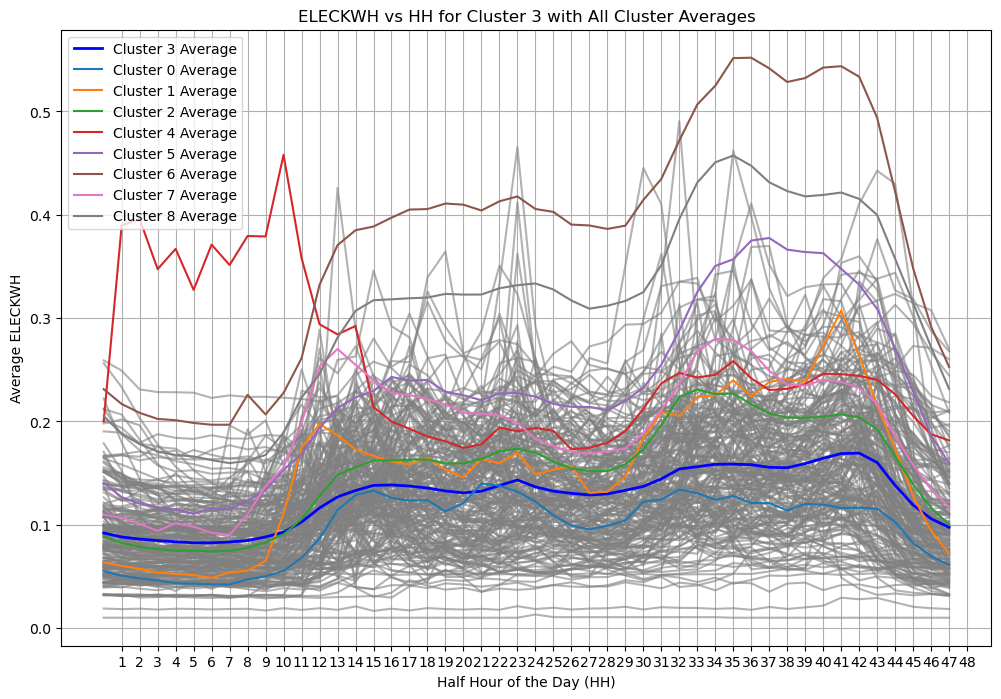

In [63]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 3
cluster_3_data = df_with_clusters[df_with_clusters['Cluster'] == 3]

# Calculate the average ELECKWH per HH for each ANON_ID in Cluster 3
cluster_3_avg_by_anon = (
    cluster_3_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Calculate the average ELECKWH per HH for all clusters
all_clusters_avg = (
    df_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot all ANON_IDs in Cluster 3 in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_3_avg_by_anon[cluster_3_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Plot the average for Cluster 3 in blue
cluster_3_avg = (
    cluster_3_avg_by_anon.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)
plt.plot(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Add averages for all other clusters in different colors
cluster_colors = ['red', 'green', 'orange', 'purple', 'brown']  # Define a color palette
for cluster in all_clusters_avg['Cluster'].unique():
    if cluster != 3:  # Exclude Cluster 3 (already plotted in blue)
        cluster_data = all_clusters_avg[all_clusters_avg['Cluster'] == cluster]
        plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster} Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3 with All Cluster Averages')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


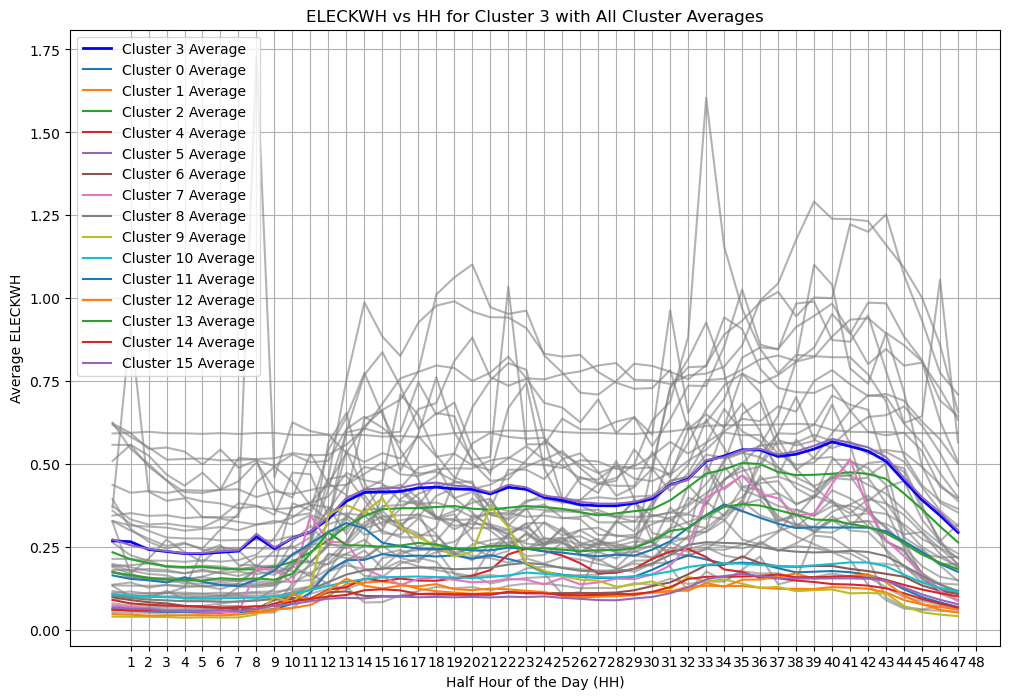

In [240]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 3
cluster_3_data = df_with_clusters[df_with_clusters['Cluster'] == 5]

# Calculate the average ELECKWH per HH for each ANON_ID in Cluster 3
cluster_3_avg_by_anon = (
    cluster_3_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Calculate the average ELECKWH per HH for all clusters
all_clusters_avg = (
    df_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot all ANON_IDs in Cluster 3 in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_3_avg_by_anon[cluster_3_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Plot the average for Cluster 3 in blue
cluster_3_avg = (
    cluster_3_avg_by_anon.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)
plt.plot(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Add averages for all other clusters in different colors
cluster_colors = ['red', 'green', 'orange', 'purple', 'brown']  # Define a color palette
for cluster in all_clusters_avg['Cluster'].unique():
    if cluster != 3:  # Exclude Cluster 3 (already plotted in blue)
        cluster_data = all_clusters_avg[all_clusters_avg['Cluster'] == cluster]
        plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster} Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3 with All Cluster Averages')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## import matplotlib.pyplot as plt

# Filter the data for Cluster 3
cluster_3_data = df_with_clusters[df_with_clusters['Cluster'] == 3]

# Calculate the average ELECKWH per HH for Cluster 3
cluster_3_avg = (
    cluster_3_data.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge the cluster average back with the individual ANON_ID data
cluster_3_data = cluster_3_data.merge(cluster_3_avg, on='HH', how='left')

# Calculate the absolute difference from the cluster average for each ANON_ID
cluster_3_data['Difference'] = cluster_3_data['ELECKWH'] - cluster_3_data['Cluster_Avg_ELECKWH']

# Calculate the mean difference per ANON_ID
anon_diff = (
    cluster_3_data.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative differences
most_positive_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the identified ANON_IDs
positive_anon_data = (
    cluster_3_data[cluster_3_data['ANON_ID'] == most_positive_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data = (
    cluster_3_data[cluster_3_data['ANON_ID'] == most_negative_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot the cluster average
plt.scatter(cluster_3_avg['HH'], cluster_3_avg['Cluster_Avg_ELECKWH'], color='blue', label='Cluster 3 Average', s=50)

# Plot the most positive ANON_ID
plt.scatter(positive_anon_data['HH'], positive_anon_data['ELECKWH'], color='green', label=f'Most Positive ANON_ID Avg: {most_positive_anon}', s=50)

# Plot the most negative ANON_ID
plt.scatter(negative_anon_data['HH'], negative_anon_data['ELECKWH'], color='red', label=f'Most Negative ANON_ID Avg: {most_negative_anon}', s=50)

# Plot details
plt.title('ELECKWH vs HH for Cluster 3: Average and Extremes (Averaged per HH)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


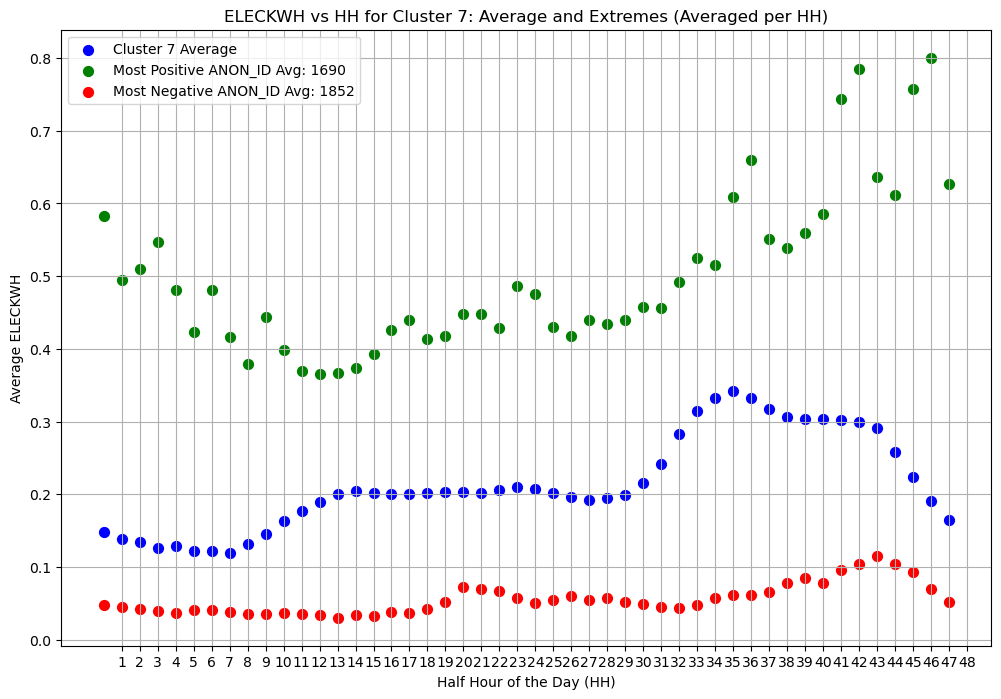

In [284]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 7
cluster_7_data = df_with_clusters[df_with_clusters['Cluster'] == 5]

# Calculate the average ELECKWH per HH for Cluster 7
cluster_7_avg = (
    cluster_7_data.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge the cluster average back with the individual ANON_ID data
cluster_7_data = cluster_7_data.merge(cluster_7_avg, on='HH', how='left')

# Calculate the absolute difference from the cluster average for each ANON_ID
cluster_7_data['Difference'] = cluster_7_data['ELECKWH'] - cluster_7_data['Cluster_Avg_ELECKWH']

# Calculate the mean difference per ANON_ID
anon_diff = (
    cluster_7_data.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative differences
most_positive_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the identified ANON_IDs
positive_anon_data = (
    cluster_7_data[cluster_7_data['ANON_ID'] == most_positive_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data = (
    cluster_7_data[cluster_7_data['ANON_ID'] == most_negative_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot the cluster average
plt.scatter(cluster_7_avg['HH'], cluster_7_avg['Cluster_Avg_ELECKWH'], color='blue', label='Cluster 7 Average', s=50)

# Plot the most positive ANON_ID
plt.scatter(positive_anon_data['HH'], positive_anon_data['ELECKWH'], color='green', label=f'Most Positive ANON_ID Avg: {most_positive_anon}', s=50)

# Plot the most negative ANON_ID
plt.scatter(negative_anon_data['HH'], negative_anon_data['ELECKWH'], color='red', label=f'Most Negative ANON_ID Avg: {most_negative_anon}', s=50)

# Plot details
plt.title('ELECKWH vs HH for Cluster 7: Average and Extremes (Averaged per HH)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


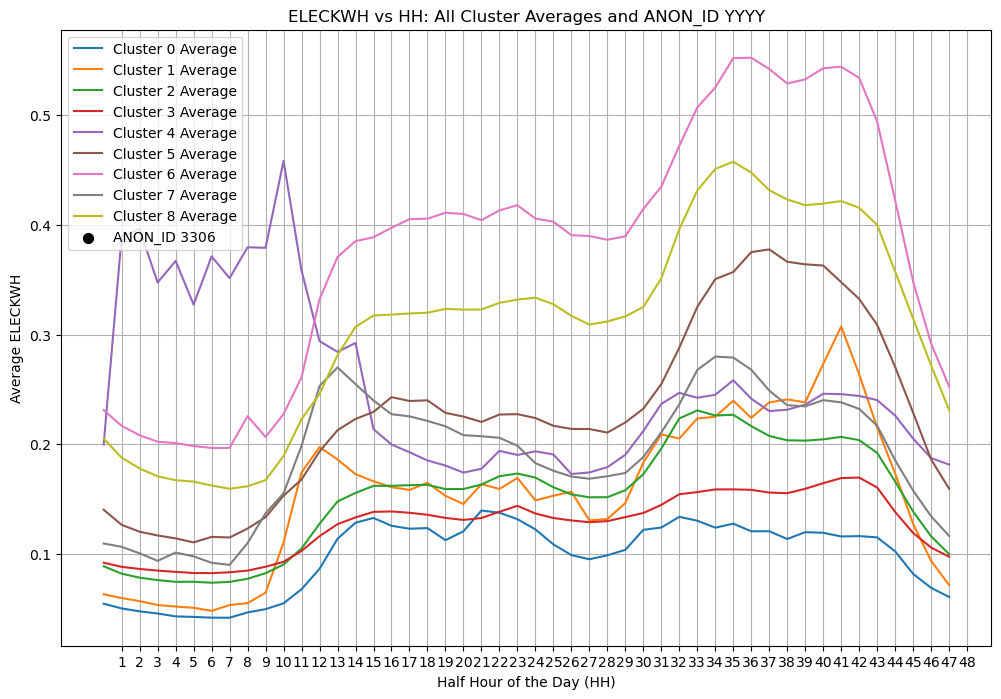

In [477]:
import matplotlib.pyplot as plt

# Calculate the average ELECKWH per HH for each cluster
cluster_avg = (
    df_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Extract data for ANON_ID 3306
anon_3306_data = (
    df_with_clusters[df_with_clusters['ANON_ID'] == 2177]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot the cluster averages
cluster_colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'cyan']  # Define a palette for clusters
for cluster in cluster_avg['Cluster'].unique():
    cluster_data = cluster_avg[cluster_avg['Cluster'] == cluster]
    plt.plot(cluster_data['HH'], cluster_data['Cluster_Avg_ELECKWH'], label=f'Cluster {cluster} Average')

# Plot the ANON_ID 3306 data
plt.scatter(anon_3306_data['HH'], anon_3306_data['ELECKWH'], color='black', label='ANON_ID 3306', s=50)

# Plot details
plt.title('ELECKWH vs HH: All Cluster Averages and ANON_ID YYYY')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


In [471]:
# Filter the data for ANON_ID = 3306
anon_3306_data = df100selected_features[df100selected_features['ANON_ID'] == 2177]

# Compute the mean values of the features for ANON_ID = 3306
anon_3306_means = anon_3306_data.mean(numeric_only=True).to_frame().T

# Add a column to identify it as ANON_ID = 3306
anon_3306_means['Cluster'] = 'ANON_ID YYYY'

# Reset index for the computed means to match cluster_means
anon_3306_means.reset_index(drop=True, inplace=True)

# Append the row to the cluster_means DataFrame
cluster_means_with_anon = pd.concat([cluster_means, anon_3306_means], ignore_index=True)


In [473]:
cluster_means_with_anon


Cluster   RME_bre   RME_eve   RME_day   RME_nig     RSD_avg    WScore  \
0             0  1.200000  1.190000  1.180000  0.560000   98.000000  0.030000   
1             1  1.060000  1.380000  1.040000  0.450000  113.810000  0.080000   
2             2  1.030000  1.360000  1.130000  0.590000   90.170000  0.070000   
3             3  1.050000  1.240000  1.070000  0.720000   56.410000 -0.010000   
4             4  0.870000  0.950000  0.800000  1.270000  104.560000  0.070000   
5             5  0.990000  1.440000  1.010000  0.640000   82.090000  0.100000   
6             6  1.010000  1.420000  1.080000  0.580000   68.260000  0.050000   
7             7  1.250000  1.250000  1.010000  0.640000  120.700000  0.040000   
8             8  0.990000  1.380000  1.080000  0.640000   71.300000  0.050000   
9  ANON_ID YYYY  0.984436  0.945091  1.162657  0.923318  115.210844 -0.080812   

   Avg_Daily_Max_Min_Diff  Avg_Day_Eve  ANON_ID  Cluster_HC  
0                0.530000     0.130000      NaN         NaN  
1                0.710000     0.220000      NaN         NaN  
2                0.700000     0.190000      NaN         NaN  
3                0.350000     0.150000      NaN         NaN  
4                1.260000     0.220000      NaN         NaN  
5                0.780000     0.290000      NaN         NaN  
6                1.030000     0.480000      NaN         NaN  
7                1.150000     0.220000      NaN         NaN  
8                1.030000     0.380000      NaN         NaN  
9                0.061209     0.027404   2177.0        10.0

In [475]:
anon_ids_to_drop


[378,
 398,
 410,
 477,
 629,
 681,
 839,
 924,
 1221,
 1319,
 1355,
 1386,
 1436,
 1455,
 1458,
 1551,
 1571,
 1614,
 1664,
 1771,
 1846,
 1946,
 2002,
 2158,
 2207,
 2241,
 2369,
 2443,
 2558,
 2602,
 2629,
 2733,
 2846,
 3166,
 3212,
 3300,
 3439,
 3649,
 3928,
 4228,
 4280,
 4711,
 4827]

### Section 2.3.9 Apply k-means because there is not Gaussian Distribution on each feature